# Apply Naive Bayes on Donor Choose preprocessed data


## DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

### About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


### After preprocessing train.csv and resource.csv


After preprocessing these two datasets, I got **preprocessed_data.csv**, in which I have feature names as follow.

**'school_state'**, **'teacher_prefix'**, **'project_grade_category'**, **'teacher_number_of_previously_posted_projects'**, **'project_is_approved'**, **'clean_categories'**, **'clean_subcategories'**, **'essay'**, **'price'**
 


In [4]:
#import the libraries
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer

from scipy.sparse import hstack, vstack
"""
if you want to use np.hstack() then all the dimension of the array that have passed as
tuple should be same other wise it will give error
""" 

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [2]:
#Taking only 50k data points because of small RAM of my device
data = pd.read_csv('preprocessed_data.csv', nrows=50000)
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
y = data['project_is_approved'].values
X = data.drop('project_is_approved', axis=1)


<h3>1.2.1 Splitting data into Train, CV and test

In [5]:
#train data 67%, test data = 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y)

#again split 67% train data into train data and cross-validation data
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.33, stratify=y_train)

print('Training data = ', (X_train.shape[0]/X.shape[0])*100, '%')
print('Cross-validation data = ', (X_cv.shape[0]/X.shape[0])*100, '%')
print("Test data = ", (X_test.shape[0]/X.shape[0])*100, "%")

Training data =  44.89 %
Cross-validation data =  22.11 %
Test data =  33.0 %


<h2>1.3 Make Data Model Ready: encoding essay, and project_title(optional)</h2>

##### We have only one text data feature named as **'essay'**
##### Do encoding using <font color = 'green'>**BOW**</font> and <font color = 'green'>**TFIDF**</font> on text feature **'essay'**

In [6]:
X_train_essay = X_train['essay'].values
X_cv_essay = X_cv['essay'].values
X_test_essay = X_test['essay'].values


<h3>1.3.1 BOW vectorization on text data

In [7]:
def BOW_with_diff_ngram_max_features(train_data, cv_data, test_data, ngram_range, min_df, max_df, max_features):
    print("Shape, before BOW vectorization")
    print(X_train.shape, y_train.shape)
    print(X_cv.shape, y_cv.shape)
    print(X_test.shape, y_test.shape)
    print("="*100)


    essay_bow = CountVectorizer(ngram_range=ngram_range, min_df=min_df, max_df=max_df, max_features=max_features)
    #fit the train data
    essay_bow.fit(train_data)

    #transform  train and test text data to vector
    X_train_essay_bow = essay_bow.transform(train_data)
    X_cv_essay_bow = essay_bow.transform(cv_data)
    X_test_essay_bow = essay_bow.transform(test_data)

    print("Shape, after BOW vectorization")
    print(X_train_essay_bow.shape, y_train.shape)
    print(X_cv_essay_bow.shape, y_cv.shape)
    print(X_test_essay_bow.shape, y_test.shape)
    
    return X_train_essay_bow, X_cv_essay_bow, X_test_essay_bow, essay_bow

##### 1.3.1.1 BOW vectorization on unigram_bigram{ngram_range =(1,2)} and maximum 15k features

In [43]:
unigram_bigram = (1, 2); min_df = 10; max_df = 5000; max_features = 15000;
X_train_essay_unigram_15k_max_features_bow, X_cv_essay_unigram_15k_max_features_bow,\
    X_test_essay_unigram_15k_max_features_bow, essay_bow_15k_ngram12= \
        BOW_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, unigram_bigram, \
            min_df, max_df, max_features)

Shape, before BOW vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after BOW vectorization
(22445, 15000) (22445,)
(11055, 15000) (11055,)
(16500, 15000) (16500,)


##### 1.3.1.2 BOW vectorization on unigram_bigram{ngram_range =(1,2)} and maximum 20k features

In [44]:
"""
     A typical starting point might be max_df=0.75 or max_df=0.85. 
     This excludes terms that appear in more than 75% or 85% of the documents.
"""

unigram_bigram = (1, 2); min_df = 10; max_df = 0.85; max_features = 20000;
X_train_essay_unigram_20k_max_features_bow, X_cv_essay_unigram_20k_max_features_bow,\
     X_test_essay_unigram_20k_max_features_bow, essay_bow_20k_ngram12= \
          BOW_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, unigram_bigram, \
               min_df, max_df, max_features)

Shape, before BOW vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after BOW vectorization
(22445, 20000) (22445,)
(11055, 20000) (11055,)
(16500, 20000) (16500,)


##### 1.3.1.3 BOW vectorization on unigram_bigram{ngram_range =(1,2)} with as much as max features can be

In [8]:
unigram_bigram = (1, 2); min_df = 10; max_df = 0.85; max_features = None;
X_train_essay_unigram_asmuchas_max_features_bow, X_cv_essay_unigram_asmuchas_max_features_bow, \
     X_test_essay_unigram_asmuchas_max_features_bow, essay_bow_asmuchas_max_feature_ngram12= \
          BOW_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, unigram_bigram,\
               min_df, max_df, max_features)

Shape, before BOW vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after BOW vectorization
(22445, 50938) (22445,)
(11055, 50938) (11055,)
(16500, 50938) (16500,)


##### 1.3.1.4 BOW vectorization on ngram_range =(1,4) with as much as max features can be
ngram_range = (1, 4) ==> unigram, bigram, trigram, quadgram

In [7]:
ngram = (1, 4); min_df = 10; max_df = 0.85; max_features = None;
X_train_essay_ngram_asmuchas_max_features_bow, X_cv_essay_ngram_asmuchas_max_features_bow, \
    X_test_essay_ngram_asmuchas_max_features_bow, essay_bow_asmuchas_max_feature_ngram14= \
        BOW_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, ngram, \
            min_df, max_df, max_features)

Shape, before BOW vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after BOW vectorization
(22445, 72343) (22445,)
(11055, 72343) (11055,)
(16500, 72343) (16500,)


##### 1.3.1.5 BOW vectorization on ngram_range =(1,4) with 15k max features

In [45]:
ngram = (1, 4); min_df = 10; max_df = 5000; max_features = 15000;
X_train_essay_ngram_15k_max_features_bow, X_cv_essay_ngram_15k_max_features_bow, \
    X_test_essay_ngram_15k_max_features_bow, essay_bow_15k_ngram14= \
        BOW_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, ngram, \
            min_df, max_df, max_features)

Shape, before BOW vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after BOW vectorization
(22445, 15000) (22445,)
(11055, 15000) (11055,)
(16500, 15000) (16500,)


##### 1.3.1.6 BOW vectorization on ngram_range =(1,4) with 20k max features

In [46]:
ngram = (1, 4); min_df = 10; max_df = 5000; max_features = 20000;
X_train_essay_ngram_20k_max_features_bow, X_cv_essay_ngram_20k_max_features_bow, \
    X_test_essay_ngram_20k_max_features_bow, essay_bow_20k_ngram14= \
        BOW_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, ngram, \
            min_df, max_df, max_features)

Shape, before BOW vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after BOW vectorization
(22445, 20000) (22445,)
(11055, 20000) (11055,)
(16500, 20000) (16500,)


In [14]:
#show the name of last 100 features
last_100_features = essay_bow_20k_ngram14.get_feature_names()[19900:20000] #it returns list
print(last_100_features)
print(len(last_100_features))


['young musicians', 'young people', 'young people eager', 'young people they', 'young person', 'young readers', 'young scholars', 'young scientists', 'young student', 'young students', 'young students learn', 'young students need', 'young women', 'young writers', 'younger', 'younger age', 'younger children', 'younger grades', 'younger siblings', 'younger students', 'youngest', 'youngest learners', 'youngest students', 'youngsters', 'your', 'your contribution', 'your contribution help', 'your contribution project', 'your donation', 'your donation allow', 'your donation allow students', 'your donation classroom', 'your donation give', 'your donation give students', 'your donation go', 'your donation greatly', 'your donation greatly appreciated', 'your donation help', 'your donation help provide', 'your donation help students', 'your donation help us', 'your donation make', 'your donation not', 'your donation project', 'your donation project help', 'your donation provide', 'your donation 

<h3>1.3.2 TFIDF vectorization on text data

In [30]:
def TFIDF_with_diff_ngram_max_features(train_data, cv_data, test_data, ngram_range, min_df, max_df, max_features):
    print("Shape, before TFIDF vectorization")
    print(X_train.shape, y_train.shape)
    print(X_cv.shape, y_cv.shape)
    print(X_test.shape, y_test.shape)
    print("="*100)
    
    essay_tfidf = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df, max_df=max_df, max_features=max_features)
    #fit the train data of essay
    essay_tfidf.fit(train_data)
    
    #transform the data
    X_train_essay_tfidf = essay_tfidf.transform(train_data)
    X_cv_essay_tfidf = essay_tfidf.transform(cv_data)
    X_test_essay_tfidf = essay_tfidf.transform(test_data)
    
    print("Shape, after TFIDF vectorization")
    print(X_train_essay_tfidf.shape, y_train.shape)
    print(X_cv_essay_tfidf.shape, y_cv.shape)
    print(X_test_essay_tfidf.shape, y_test.shape)
    
    return X_train_essay_tfidf, X_cv_essay_tfidf, X_test_essay_tfidf, essay_tfidf
    
    
    

##### 1.3.2.1 TFIDF vectorization on unigram_bigram{ngram_range =(1,2)} and maximum 15k features

In [94]:
unigram_bigram = (1, 2); min_df = 10; max_df = 5000; max_features = 15000;
X_train_essay_unigram_15k_max_features_tfidf, X_cv_essay_unigram_15k_max_features_tfidf, \
    X_test_essay_unigram_15k_max_features_tfidf, essay_tfidf_15k_ngram12= \
        TFIDF_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, unigram_bigram, \
            min_df, max_df, max_features)

Shape, before TFIDF vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after TFIDF vectorization
(22445, 15000) (22445,)
(11055, 15000) (11055,)
(16500, 15000) (16500,)


##### 1.3.2.2 TFIDF vectorization on unigram_bigram{ngram_range =(1,2)} and maximum 20k features

In [85]:
unigram_bigram = (1, 2); min_df = 10; max_df = 5000; max_features = 20000;
X_train_essay_unigram_20k_max_features_tfidf, X_cv_essay_unigram_20k_max_features_tfidf, \
    X_test_essay_unigram_20k_max_features_tfidf, essay_tfidf_20k_ngram12= \
        TFIDF_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, unigram_bigram, \
            min_df, max_df, max_features)

Shape, before TFIDF vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after TFIDF vectorization
(22445, 20000) (22445,)
(11055, 20000) (11055,)
(16500, 20000) (16500,)


##### 1.3.2.3 TFIDF vectorization on unigram_bigram{ngram_range = (1,2)} with features as max as can be

In [31]:
unigram_bigram = (1, 2); min_df = 10; max_df = 5000; max_features = None;
X_train_essay_unigram_asmuchas_max_features_tfidf, X_cv_essay_unigram_asmuchas_max_features_tfidf, \
    X_test_essay_unigram_asmuchas_max_features_tfidf, essay_tfidf_asmuchas_ngram12= \
        TFIDF_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, unigram_bigram, \
            min_df, max_df, max_features)

Shape, before TFIDF vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after TFIDF vectorization
(22445, 50869) (22445,)
(11055, 50869) (11055,)
(16500, 50869) (16500,)


##### 1.3.2.4 TFIDF vectorization on ngram_range =(1,4) with as much as max features can be
ngram_range = (1, 4) ==> unigram, bigram, trigram, quadgram

In [37]:
ngram = (1, 4); min_df = 10; max_df = 5000; max_features = None;
X_train_essay_ngram_asmuchas_max_features_tfidf, X_cv_essay_ngram_asmuchas_max_features_tfidf, \
    X_test_essay_ngram_asmuchas_max_features_tfidf, essay_tfidf_asmuchas_ngram14= \
        TFIDF_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, ngram, \
            min_df, max_df, max_features)

Shape, before TFIDF vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after TFIDF vectorization
(22445, 72462) (22445,)
(11055, 72462) (11055,)
(16500, 72462) (16500,)


##### 1.3.2.5 TFIDF vectorization on ngram_range =(1,4) with 15k max features

In [115]:
ngram = (1, 4); min_df = 10; max_df = 5000; max_features = 15000;
X_train_essay_ngram_15k_max_features_tfidf, X_cv_essay_ngram_15k_max_features_tfidf, \
    X_test_essay_ngram_15k_max_features_tfidf, essay_tfidf_15k_ngram14= \
        TFIDF_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, ngram, \
            min_df, max_df, max_features)

Shape, before TFIDF vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after TFIDF vectorization
(22445, 15000) (22445,)
(11055, 15000) (11055,)
(16500, 15000) (16500,)


##### 1.3.2.6 TFIDF vectorization on ngram_range =(1,4) with 20k max features

In [106]:
ngram = (1, 4); min_df = 10; max_df = 5000; max_features = 20000;
X_train_essay_ngram_20k_max_features_tfidf, X_cv_essay_ngram_20k_max_features_tfidf, \
    X_test_essay_ngram_20k_max_features_tfidf, essay_tfidf_20k_ngram14= \
        TFIDF_with_diff_ngram_max_features(X_train_essay, X_cv_essay, X_test_essay, ngram, \
            min_df, max_df, max_features)

Shape, before TFIDF vectorization
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
Shape, after TFIDF vectorization
(22445, 20000) (22445,)
(11055, 20000) (11055,)
(16500, 20000) (16500,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

### 1.4.1 one hot encoding on catagorical features
catagorical features
- school_state
- teacher_prefix
- project_grade_catagory
- clean_catagories
- clean_subcatagories

###### Apply One-Hot Encoding on the categorical features either using <font color = 'yellow'>**OneHotEncoder()</font> (or) <font color = 'yellow'>CountVectorizer(binary=True)**</font>

In [9]:
def one_hot_encoder(train_array, cv_array, test_array, catagorical_feature_name):
    print(f"Shape, before one hot encoding(OHE)on feature '{catagorical_feature_name}'")
    print(X_train[catagorical_feature_name].shape, y_train.shape)
    print(X_cv[catagorical_feature_name].shape, y_cv.shape)
    print(X_test[catagorical_feature_name].shape, y_test.shape)
    print("="*100)

    encoder = CountVectorizer(binary=True)

    #fit() and transform() methods takes 2D array that's why I have used reshape() method
    encoder.fit(train_array)

    train_encoder = encoder.transform(train_array)
    cv_encoder = encoder.transform(cv_array)
    test_encoder = encoder.transform(test_array)

    print("Shape after One Hot Encoding(OHE)")
    print(train_encoder.shape, y_train.shape)
    print(cv_encoder.shape, y_cv.shape)
    print(test_encoder.shape, y_test.shape)
    print("="*100)

    print(f"\nOne Hot Encoded catagorical feature '{catagorical_feature_name}', features name= \n\t{encoder.get_feature_names_out()}")

    return encoder, train_encoder, cv_encoder, test_encoder
    


##### 1.4.1.1 one hot encoding on feature <font color = 'green'>**'school_state'**</font>

In [10]:
#school state train and test data
# school_state_train_arr = np.array(X_train['school_state']) #OR==> X_train['school_state'].values
# school_state_test_arr = np.array(X_test['school_state'])

school_state_train_arr = X_train['school_state'].values
school_state_cv_arr = X_cv['school_state'].values
school_state_test_arr = X_test['school_state'].values


In [11]:
school_state_OHE, school_state_train_OHE, school_state_cv_OHE, school_state_test_OHE = \
    one_hot_encoder(school_state_train_arr, school_state_cv_arr, school_state_test_arr, 'school_state')


Shape, before one hot encoding(OHE)on feature 'school_state'
(22445,) (22445,)
(11055,) (11055,)
(16500,) (16500,)
Shape after One Hot Encoding(OHE)
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)

One Hot Encoded catagorical feature 'school_state', features name= 
	['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


In [22]:
#we can see, which catagory is at which row in catagorical feature 'school_state'
print(school_state_train_OHE[0])

col = school_state_train_OHE[0].indices
print(f"  Encoded catagorical feature 'school_state' first row state name index is= {col[0]}")

  (0, 19)	1
  Encoded catagorical feature 'school_state' first row state name index is= 19


 (0, 19)	1

 means, first row(0'th index) of 'school_state' catagorical feature in "X_train" has the catagory "school_state_OHE.get_feature_names_out()[19]"

 Note: You can see below code

In [23]:
print(school_state_OHE.get_feature_names_out()[school_state_train_OHE[0].indices])
#OR
print(X_train['school_state'][:1].values)#first row(0'th index) value of 'school_state' catagorical feature

['ma']
['ma']


In [26]:
#get all the paramaeters that we have set for oneHotEncoding
x = school_state_OHE.get_params()
x

{'analyzer': 'word',
 'binary': True,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

##### 1.4.1.2 one hot encoding on feature <font color = 'green'>**'teacher_prefix'**</font>

In [12]:
teacher_prefix_OHE, teacher_prefix_train_OHE, teacher_prefix_cv_OHE, teacher_prefix_test_OHE = \
    one_hot_encoder(X_train['teacher_prefix'].values, X_cv['teacher_prefix'].values, \
        X_test['teacher_prefix'].values, 'teacher_prefix')


Shape, before one hot encoding(OHE)on feature 'teacher_prefix'
(22445,) (22445,)
(11055,) (11055,)
(16500,) (16500,)
Shape after One Hot Encoding(OHE)
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)

One Hot Encoded catagorical feature 'teacher_prefix', features name= 
	['dr' 'mr' 'mrs' 'ms' 'teacher']


##### 1.4.1.3 one hot encoding on feature <font color = 'green'>**'project_grade_category'**</font>

In [13]:
project_grade_catagory_OHE, project_grade_catagory_train_OHE, project_grade_catagory_cv_OHE, \
    project_grade_catagory_test_OHE = one_hot_encoder(X_train['project_grade_category'].values, \
        X_cv['project_grade_category'].values, X_test['project_grade_category'].values, 'project_grade_category')

Shape, before one hot encoding(OHE)on feature 'project_grade_category'
(22445,) (22445,)
(11055,) (11055,)
(16500,) (16500,)
Shape after One Hot Encoding(OHE)
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)

One Hot Encoded catagorical feature 'project_grade_category', features name= 
	['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']


##### 1.4.1.4 one hot encoding on feature <font color = 'green'>**'clean_categories'**</font>

In [14]:
clean_categories_OHE, clean_categories_train_OHE, clean_categories_cv_OHE, clean_categories_test_OHE = \
    one_hot_encoder(X_train['clean_categories'].values, X_cv['clean_categories'].values, \
        X_test['clean_categories'].values, 'clean_categories')

Shape, before one hot encoding(OHE)on feature 'clean_categories'
(22445,) (22445,)
(11055,) (11055,)
(16500,) (16500,)
Shape after One Hot Encoding(OHE)
(22445, 7) (22445,)
(11055, 7) (11055,)
(16500, 7) (16500,)

One Hot Encoded catagorical feature 'clean_categories', features name= 
	['appliedlearning' 'health_sports' 'history_civics' 'literacy_language'
 'math_science' 'music_arts' 'specialneeds']


##### 1.4.1.5 one hot encoding on feature <font color = 'green'>**'clean_subcategories'**</font>

In [15]:
clean_subcategories_OHE, clean_subcategories_train_OHE, clean_subcategories_cv_OHE, clean_subcategories_test_OHE = \
    one_hot_encoder(X_train['clean_subcategories'].values, X_cv['clean_subcategories'].values, \
        X_test['clean_subcategories'].values, 'clean_subcategories')

Shape, before one hot encoding(OHE)on feature 'clean_subcategories'
(22445,) (22445,)
(11055,) (11055,)
(16500,) (16500,)
Shape after One Hot Encoding(OHE)
(22445, 28) (22445,)
(11055, 28) (11055,)
(16500, 28) (16500,)

One Hot Encoded catagorical feature 'clean_subcategories', features name= 
	['appliedsciences' 'charactereducation' 'civics_government'
 'college_careerprep' 'communityservice' 'earlydevelopment' 'economics'
 'environmentalscience' 'esl' 'extracurricular' 'financialliteracy'
 'foreignlanguages' 'gym_fitness' 'health_lifescience' 'health_wellness'
 'history_geography' 'literacy' 'literature_writing' 'mathematics' 'music'
 'nutritioneducation' 'other' 'parentinvolvement' 'performingarts'
 'socialsciences' 'specialneeds' 'teamsports' 'visualarts']


### 1.4.2 Normalization on numerical features
numerical features
- teacher_number_of_previously_posted_projects
- price

###### Apply Normalization on the numerical features using <font color = 'yellow'>**Normalizer()**</font> not <font color = 'yellow'>StandardScaler()</font>.

Note:: 
- superiority of StandardScaler() and Normalizer() depends on the context and nature of the data.
- In conclusion, for many traditional machine learning algorithms, StandardScaler() is often the better choice due to its ability to standardize feature scales and improve model performance. However, Normalizer() is valuable in specific contexts, such as text data or sparse data scenarios, where preserving the sparsity and working with normalized vectors is more beneficial.








In [16]:
def normalization(train_data, cv_data, test_data, numerical_feature_name):
    print(f"Shape, before normalization on feature '{numerical_feature_name}'")
    print(X_train[numerical_feature_name].shape, y_train.shape)
    print(X_cv[numerical_feature_name].shape, y_cv.shape)
    print(X_test[numerical_feature_name].shape, y_test.shape)
    print("="*100)

    normalizer = Normalizer(norm='l2')

    #fit() and transform() methods takes 2D array that's why I have used reshape() method
    normalizer.fit(train_data.reshape(-1, 1))

    train_normalizer = normalizer.transform(train_data.reshape(-1, 1))
    cv_normalizer = normalizer.transform(cv_data.reshape(-1, 1))
    test_normalizer = normalizer.transform(test_data.reshape(-1, 1))


    print("Shape after normalization")
    print(train_normalizer.shape, y_train.shape)
    print(cv_normalizer.shape, y_cv.shape)
    print(test_normalizer.shape, y_test.shape)
    print("="*100)


    print(f"\nnormalized feature is '{numerical_feature_name}'")

    #below we are using astype(np.int64), other wise in randomSearch or gridSerch 
    #we'll get error as==> TypeError: can't multiply sequence by non-int of type 'numpy.float64'
    return normalizer, train_normalizer, cv_normalizer, test_normalizer
    


##### 1.4.2.1 Normalization on feature <font color = 'green'>**'teacher_number_of_previously_posted_projects'**</font>

In [17]:
teacher_number_of_PPP_normalizer, teacher_number_of_PPP_trian_normalized, teacher_number_of_PPP_cv_normalized, \
    teacher_number_of_PPP_test_normalized = normalization(X_train['teacher_number_of_previously_posted_projects']\
        .values, X_cv['teacher_number_of_previously_posted_projects'].values,\
            X_test['teacher_number_of_previously_posted_projects'].values, \
                'teacher_number_of_previously_posted_projects')

Shape, before normalization on feature 'teacher_number_of_previously_posted_projects'
(22445,) (22445,)
(11055,) (11055,)
(16500,) (16500,)
Shape after normalization
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)

normalized feature is 'teacher_number_of_previously_posted_projects'


In [35]:
print(f'normalized teacher_number_of_PPP_trian data = {teacher_number_of_PPP_trian_normalized}')
print(f'normalized teacher_number_of_PPP_test data = {teacher_number_of_PPP_test_normalized}')
np.unique(teacher_number_of_PPP_trian_normalized, return_counts=True)

normalized teacher_number_of_PPP_trian data = [[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
normalized teacher_number_of_PPP_test data = [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


(array([0., 1.]), array([ 7100, 15345]))

##### 1.4.2.2 Normalization on feature <font color = 'green'>**'price'**</font>

In [18]:
price_normalizer, price_trian_normalized, price_cv_normalized, price_test_normalized = \
    normalization(X_train['price'].values, X_cv['price'].values, X_test['price'].values, 'price')

Shape, before normalization on feature 'price'
(22445,) (22445,)
(11055,) (11055,)
(16500,) (16500,)
Shape after normalization
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)

normalized feature is 'price'


In [37]:
print(f'normalized price feature trian data = {price_trian_normalized}')
print(f'normalized price feature test data  = {price_test_normalized}')
print(f'train data count of price feature= {np.unique(price_trian_normalized, return_counts=True)}')
print(f'test data count of price feature= {np.unique(price_test_normalized, return_counts=True)}')

normalized price feature trian data = [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
normalized price feature test data  = [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
train data count of price feature= (array([1.]), array([22445]))
test data count of price feature= (array([1.]), array([16500]))


In [17]:
price_trian_normalized.shape

(22445, 1)

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>


##### Global class_prior and alpha for hyperparameter tuning

In [19]:
#15 alpha value in the range of [10^-5, 10^2]
alpha= np.logspace(2,-5, num=15)
#I am assuming, both class_prior(accepted and not accepted project)
#are equally likely
class_prior = [0.5, 0.5] 

##### feature stacking function

In [20]:
def stack_features(X_train_essay_feature_bow_or_tfidf, X_cv_essay_feature_bow_or_tfidf,\
    X_test_essay_feature_bow_or_tfidf,school_state_train_OHE = school_state_train_OHE, \
    teacher_prefix_train_OHE = teacher_prefix_train_OHE, project_grade_catagory_train_OHE= \
    project_grade_catagory_train_OHE, clean_categories_train_OHE=clean_categories_train_OHE, \
    clean_subcategories_train_OHE=clean_subcategories_train_OHE, \
    teacher_number_of_PPP_trian_normalized=teacher_number_of_PPP_trian_normalized, \
    price_trian_normalized=price_trian_normalized):
    
    #1- train data
    X_stacked_train_data_ngram_BOW_or_tfidf = hstack((school_state_train_OHE, teacher_prefix_train_OHE, \
        project_grade_catagory_train_OHE, clean_categories_train_OHE, clean_subcategories_train_OHE, teacher_number_of_PPP_trian_normalized, \
            price_trian_normalized, X_train_essay_feature_bow_or_tfidf)).tocsr()

    #2- CV data
    X_stacked_cv_data_ngram_BOW_or_tfidf = hstack((school_state_cv_OHE, teacher_prefix_cv_OHE, \
        project_grade_catagory_cv_OHE, clean_categories_cv_OHE, clean_subcategories_cv_OHE, \
            teacher_number_of_PPP_cv_normalized, price_cv_normalized, X_cv_essay_feature_bow_or_tfidf)).tocsr()

    #3- test data
    X_stacked_test_data_ngram_BOW_or_tfidf = hstack((school_state_test_OHE, teacher_prefix_test_OHE, \
        project_grade_catagory_test_OHE, clean_categories_test_OHE, clean_subcategories_test_OHE, \
            teacher_number_of_PPP_test_normalized, price_test_normalized, X_test_essay_feature_bow_or_tfidf)).tocsr()
    
    print("Final Data matrix")
    print(X_stacked_train_data_ngram_BOW_or_tfidf.shape, y_train.shape)
    print(X_stacked_cv_data_ngram_BOW_or_tfidf.shape, y_cv.shape)
    print(X_stacked_test_data_ngram_BOW_or_tfidf.shape, y_test.shape)
    print("="*100)
    
    return X_stacked_train_data_ngram_BOW_or_tfidf, X_stacked_cv_data_ngram_BOW_or_tfidf,\
        X_stacked_test_data_ngram_BOW_or_tfidf

            

##### Batch wise prediction function

In [21]:
def batch_predict(clf, data, batch_size = 1000):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of
    # the positive class not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%batch_size
    # consider, your X_tr shape is 49041 and batch_size = 1000,
    # then your tr_loop will be ==> 49041 - 49041%1000 = 49000
    
    # in this for loop we will iterate until the last 1000 multiplier
    for i in range(0, tr_loop, batch_size):
        y_data_pred.extend(clf.predict_proba(data[i:i+batch_size])[:,1])
    # we will be predicting for the last (49041%1000=41) data points
    if data.shape[0]%batch_size !=0:   
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

##### Get best alpha and plot Train and CV graph with different value of alpha

In [22]:
def get_train_cv_auc_and_best_alpha(X_train_stacked, X_cv_stacked, var_smoothing_param, class_prior, batch_size = 1000, y_cv=y_cv, y_train=y_train):
    train_auc = []
    cv_auc = []
    prev_cv_auc = 0
    best_alpha = 0
    for var_smoothing in tqdm(var_smoothing_param):
        nb_clf = MultinomialNB(alpha=var_smoothing, class_prior=class_prior)
        nb_clf.fit(X_train_stacked, y_train)

        y_train_pred = batch_predict(nb_clf, X_train_stacked, batch_size)    
        y_cv_pred = batch_predict(nb_clf, X_cv_stacked, batch_size)

        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs  
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
        
        #calculate best alpha
        curr_cv_auc = roc_auc_score(y_cv, y_cv_pred)   
        if(prev_cv_auc < curr_cv_auc):
            best_alpha = var_smoothing
            prev_cv_auc = curr_cv_auc   #update prev auc
            
    return train_auc, cv_auc, best_alpha

def hyperparam_tune_using_train_cv_auc_plot(train_auc, cv_auc, var_smoothing_param):
    plt.plot(np.log(var_smoothing_param), train_auc, label='Train AUC')
    plt.plot(np.log(var_smoothing_param), cv_auc, label='CV AUC')

    plt.scatter(np.log(var_smoothing_param), train_auc, label='Train AUC points')
    plt.scatter(np.log(var_smoothing_param), cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("log(alpha: hyperparameter)")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

##### Test performance of multinomialNB()

In [23]:
def test_performance_on_best_alpha_with_plot(X_stacked_train_data, X_stacked_cv_data, X_stacked_test_data, alpha, \
    class_prior=class_prior, batch_size=1000,y_train=y_train, y_cv=y_cv, y_test=y_test, x_label='FPR',\
        y_label='TPR', plot_title='ERROR PLOTS'):
    nb_clf = MultinomialNB(alpha=alpha, class_prior=class_prior)
    #traindata  = train + cv
    train_data_x = vstack((X_stacked_train_data, X_stacked_cv_data)).tocsr()
    train_data_y = np.concatenate((y_train, y_cv), axis = 0)#row wise/vertically concatination
    nb_clf.fit(train_data_x.toarray(), train_data_y)

    y_train_pred = batch_predict(nb_clf, train_data_x.toarray(), batch_size=batch_size)    
    y_test_pred = batch_predict(nb_clf, X_stacked_test_data.toarray(), batch_size = batch_size)

    train_fpr, train_tpr, train_thresholds = roc_curve(train_data_y, y_train_pred)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.grid()
    plt.show()
    return train_fpr, test_fpr, train_tpr, test_tpr, train_thresholds, test_thresholds, \
        y_train_pred, y_test_pred, nb_clf

##### Method to calculate best_threshold and predict the value based on best_threshold

**Note::**  

The threshold, that gives least ***FPR***, will be best threshold.

In [24]:
def find_best_threshold(threshould, fpr, tpr):
    best_t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("Max value of 'tpr*(1-fpr)'", max(tpr*(1-fpr)), "for threshold", np.round(best_t,3))
    return best_t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

##### Print Top k features

In [25]:
def top_k_features(vectorizer, feature_log_probability, top_k = 20, space_adjustment = 25, \
    color="\x1b[1;31m", reset_color="\x1b[0;0m"):
    
    #argsort(), sort the values in ascending order by returning their indexes
    #for this problem, whichever will have higher probability, that index(let that index is "i") value of
    # essay_bow_15k_ngram12.get_feature_names_out()[i] will be most important feature
    # so we need reversed index of argsort(agument) method 
    #To reverse argsort() returned value, we need to multiply "-1" with argument that will
    #passed to argsort()
    top_k_features = np.argsort((-1)*feature_log_probability)[:top_k]
    
    space = space_adjustment + 16
    print(f"{color}{'Top 20 features name':{space}}{'Their log_prob'}{reset_color}")
    for top_feature_index in top_k_features:
        print(f"{vectorizer.get_feature_names_out()[top_feature_index]:{space_adjustment}} : \
            {feature_log_probability[top_feature_index]}")

##### Accuracy using confusion matrix

In [26]:
def accuracy_using_conf_matrix(conf_mat):
    return ((conf_mat[0][0] + conf_mat[1][1])/(conf_mat[0][0] + conf_mat[0][1] \
                                                + conf_mat[1][0] + conf_mat[1][1]))*100

### 1.5.1 Set 1

<li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>

#### 1.5.1.1 catagorical, numerical features + preprocessed_essay(BOW) where ngram_range = (1,2) and max_features = 20k


##### 1.5.1.1.1 Stack all the features

In [47]:
#we may use defined function for stacking that is above
#1- train data
X_stacked_train_data_BOW_ngram12_20k_features = hstack((school_state_train_OHE, teacher_prefix_train_OHE, \
    project_grade_catagory_train_OHE, clean_categories_train_OHE, clean_subcategories_train_OHE, teacher_number_of_PPP_trian_normalized, \
        price_trian_normalized, X_train_essay_unigram_20k_max_features_bow)).tocsr()

#2- CV data
X_stacked_cv_data_BOW_ngram12_20k_features = hstack((school_state_cv_OHE, teacher_prefix_cv_OHE, \
    project_grade_catagory_cv_OHE, clean_categories_cv_OHE, clean_subcategories_cv_OHE, \
        teacher_number_of_PPP_cv_normalized, price_cv_normalized, X_cv_essay_unigram_20k_max_features_bow)).tocsr()

#3- test data
X_stacked_test_data_BOW_ngram12_20k_features = hstack((school_state_test_OHE, teacher_prefix_test_OHE, \
    project_grade_catagory_test_OHE, clean_categories_test_OHE, clean_subcategories_test_OHE, \
        teacher_number_of_PPP_test_normalized, price_test_normalized, X_test_essay_unigram_20k_max_features_bow)).tocsr()


print("Final Data matrix")
print(X_stacked_train_data_BOW_ngram12_20k_features.shape, y_train.shape)
print(X_stacked_cv_data_BOW_ngram12_20k_features.shape, y_cv.shape)
print(X_stacked_test_data_BOW_ngram12_20k_features.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 20097) (22445,)
(11055, 20097) (11055,)
(16500, 20097) (16500,)


In [49]:
print(f'stacked shape = {X_stacked_train_data_BOW_ngram12_20k_features.shape}')
print(f'stacked data in the sparse matrix (non-zero elements): = {X_stacked_train_data_BOW_ngram12_20k_features.data}')
print(f'Indices of non-zero elements (row indices) = {X_stacked_train_data_BOW_ngram12_20k_features.indptr}')
print(f'Indices of non-zero elements (column indices) = {X_stacked_train_data_BOW_ngram12_20k_features.indices}')

print(f'Number of non-zero elements = {X_stacked_train_data_BOW_ngram12_20k_features.nnz}')

stacked shape = (22445, 20097)
stacked data in the sparse matrix (non-zero elements): = [1. 1. 1. ... 1. 1. 1.]
Indices of non-zero elements (row indices) = [      0     164     348 ... 3772310 3772516 3772736]
Indices of non-zero elements (column indices) = [    4    52    58 ... 19848 19928 19972]
Number of non-zero elements = 3772736


In [27]:
#other way to converte into dense
"""
    # Convert to dense format to inspect
    dense_result = stacked_train_data_BOW_ngram12_50k_features.toarray()

    print("Dense representation of the result:")
    print(dense_result)
"""

'\n    # Convert to dense format to inspect\n    dense_result = stacked_train_data_BOW_ngram12_50k_features.toarray()\n\n    print("Dense representation of the result:")\n    print(dense_result)\n'

##### 1.5.1.1.2 Hyperparameter tuning

100%|██████████| 15/15 [00:54<00:00,  3.66s/it]


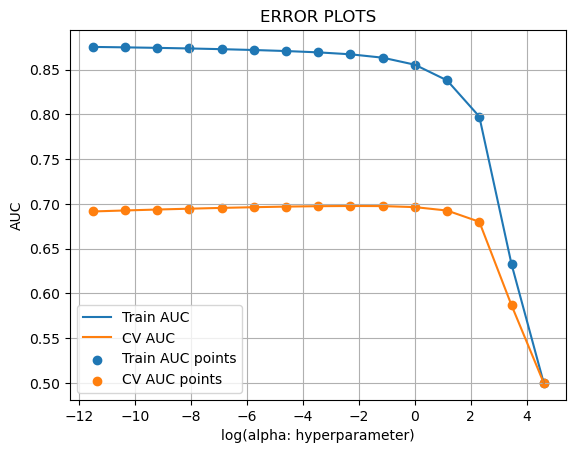

best alpha = 0.1


In [48]:
train_roc_auc112, cv_roc_auc112, best_alpha112 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_BOW_ngram12_20k_features\
    .toarray(), X_stacked_cv_data_BOW_ngram12_20k_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc112, cv_roc_auc112, alpha)
print(f'best alpha = {best_alpha112}')

In [49]:
print(f'best log alpha = {np.log(best_alpha112)}')

best log alpha = -2.3025850929940455


##### 1.5.1.1.3 Testing the performance of the model on test data, plotting ROC Curves

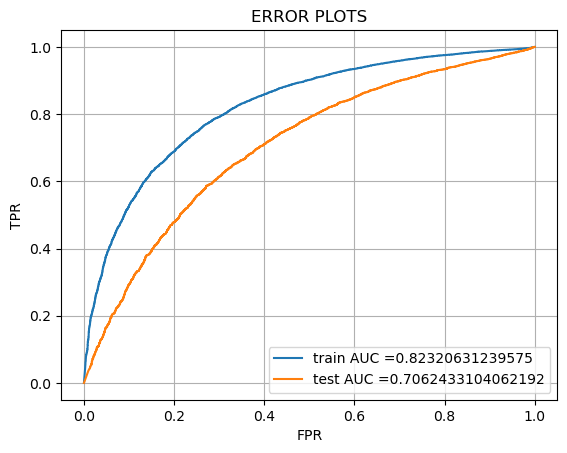

In [50]:
train_fpr113, test_fpr113, train_tpr113, test_tpr113, train_thresholds113, test_thresholds113, \
    y_train_pred113, y_test_pred113, nb_clf113= \
        test_performance_on_best_alpha_with_plot(X_stacked_train_data_BOW_ngram12_20k_features, \
            X_stacked_cv_data_BOW_ngram12_20k_features,X_stacked_test_data_BOW_ngram12_20k_features, best_alpha112,\
                batch_size=500)

In [142]:
#calculate the test roc
test_auc_ngram12_20k_bow = str(auc(test_fpr113, test_tpr113))
print(f'test auc = {test_auc_ngram12_20k_bow}')

test auc = 0.7062433104062192


##### 1.5.1.1.4 find best threshold(write your own code), and get confusion matrix test data


In [51]:
# best_threshold_train = find_best_threshold(train_thresholds, train_fpr, train_tpr)

# confusion_matrix_train114 = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_threshold_train))
# print(f"Confusion matrix for Train data \n {confusion_matrix_train114}\n")

best_threshold_test114 = find_best_threshold(test_thresholds113, test_fpr113, test_tpr113)
confusion_matrix_test114 = confusion_matrix(y_test, predict_with_best_t(y_test_pred113, best_threshold_test114))
print(f"Confusion matrix for test data \n {confusion_matrix_test114}\n")


Max value of 'tpr*(1-fpr)' 0.4345685758950768 for threshold 0.841
Confusion matrix for test data 
 [[1772  870]
 [4879 8979]]



<AxesSubplot:>

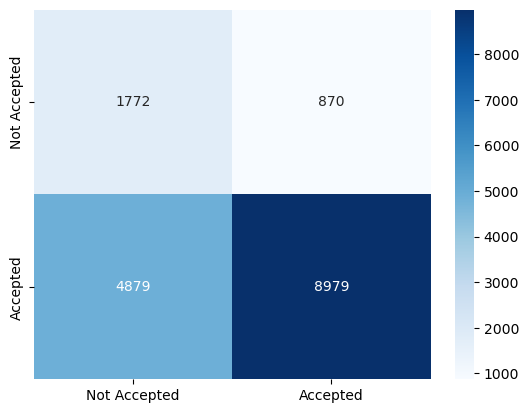

In [52]:
sns.heatmap(confusion_matrix_test114, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.1.1.5 Find accuracy using confusion matrix Test Data


##### test data accuracy

In [53]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test114)}%')

Test data accuracy = 65.15757575757576%


##### 1.5.1.1.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [54]:
top_k_features(essay_bow_20k_ngram12, nb_clf113.feature_log_prob_[1], top_k = 20)

Top 20 features name                     Their log_prob
neatly                    :             -4.794961266539
learning improve          :             -4.821987014575084
classroom however         :             -4.831580015301993
the parents               :             -5.06818099320774
not matter                :             -5.114943212654852
they much                 :             -5.127530714370952
learn new                 :             -5.153850279801013
need exposure             :             -5.182236843495518
help spark                :             -5.196550479742454
300 students              :             -5.324552594189651
marching                  :             -5.367027064067036
work student              :             -5.4705963325592215
we study                  :             -5.482096846107693
reading want              :             -5.4860156241298395
need proper               :             -5.509471433946221
use supplies              :             -5.554829195100144
da

*Top 20 features of "project not accepted" class*

In [55]:
top_k_features(essay_bow_20k_ngram12, nb_clf113.feature_log_prob_[0], top_k = 20)

Top 20 features name                     Their log_prob
learning improve          :             -4.739273983285379
neatly                    :             -4.807153955318068
classroom however         :             -4.868221350529355
not matter                :             -5.051898761284962
learn new                 :             -5.094477419088857
they much                 :             -5.1333634417599505
help spark                :             -5.133691197781303
the parents               :             -5.176556577154763
need exposure             :             -5.190858288975527
300 students              :             -5.26224526533437
marching                  :             -5.339525456757945
need proper               :             -5.470124098007496
we study                  :             -5.471042350637385
work student              :             -5.5008806986200725
comic                     :             -5.641124288404326
able understand           :             -5.66732834730171


#### 1.5.1.2 catagorical, numerical features + preprocessed_essay(BOW) where ngram_range = (1,2) and max_features = 15k

##### 1.5.1.2.1 Stack all the features

In [56]:
X_stacked_train_data_BOW_ngram12_15k_features, X_stacked_cv_data_BOW_ngram12_15k_features,\
    X_stacked_test_data_BOW_ngram12_15k_features= stack_features(X_train_essay_unigram_15k_max_features_bow, \
        X_cv_essay_unigram_15k_max_features_bow,X_test_essay_unigram_15k_max_features_bow)

Final Data matrix
(22445, 15097) (22445,)
(11055, 15097) (11055,)
(16500, 15097) (16500,)


##### 1.5.1.2.2 Hyperparameter tuning

100%|██████████| 15/15 [00:41<00:00,  2.74s/it]


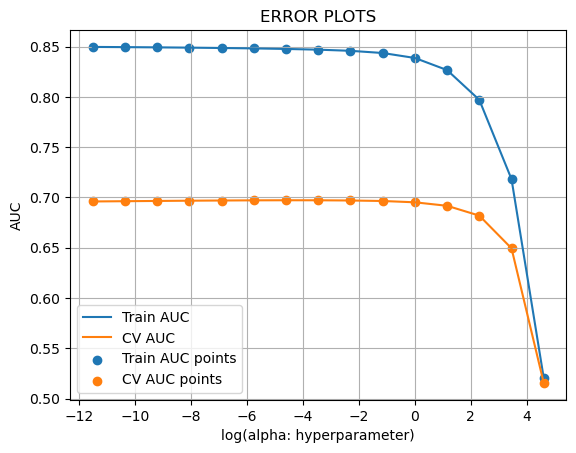

best alpha = 0.01


In [57]:
train_roc_auc122, cv_roc_auc122, best_alpha122 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_BOW_ngram12_15k_features\
    .toarray(), X_stacked_cv_data_BOW_ngram12_15k_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc122, cv_roc_auc122, alpha)
print(f'best alpha = {best_alpha122}')

In [58]:
print(f'best log alpha = {np.log(best_alpha122)}')

best log alpha = -4.605170185988091


##### 1.5.1.2.3 Testing the performance of the model on test data, plotting ROC Curves

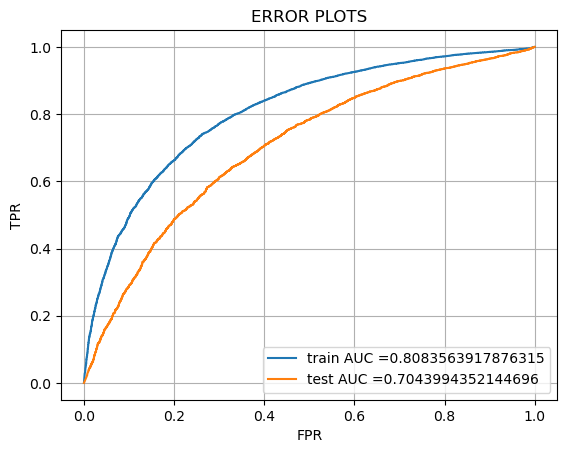

In [59]:
train_fpr123, test_fpr123, train_tpr123, test_tpr123, train_thresholds123, test_thresholds123, \
    y_train_pred123, y_test_pred123, nb_clf123= \
        test_performance_on_best_alpha_with_plot(X_stacked_train_data_BOW_ngram12_15k_features, \
            X_stacked_cv_data_BOW_ngram12_15k_features,X_stacked_test_data_BOW_ngram12_15k_features, best_alpha122,\
                batch_size=500)

In [143]:
#calculate the test roc
test_auc_ngram12_15k_bow = str(auc(test_fpr123, test_tpr123))
print(f'test auc = {test_auc_ngram12_15k_bow}')

test auc = 0.7043994352144696


##### 1.5.1.2.4 find best threshold(write your own code), and get confusion matrix for test data


Max value of 'tpr*(1-fpr)' 0.4307956368089049 for threshold 0.792


<AxesSubplot:>

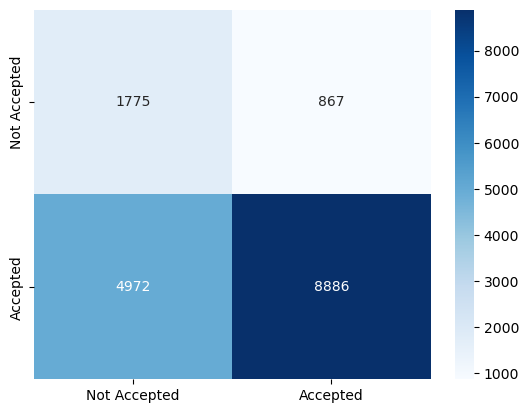

In [60]:
best_threshold124 = find_best_threshold(test_thresholds123, test_fpr123, test_tpr123)
confusion_matrix_test_data124 = confusion_matrix(y_test, predict_with_best_t(y_test_pred123, best_threshold124))
sns.heatmap(confusion_matrix_test_data124, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.1.2.5 Find accuracy using confusion matrix on Test Data


In [63]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data124)}%')

Test data accuracy = 64.61212121212121%


##### 1.5.1.2.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [64]:
top_k_features(essay_bow_15k_ngram12, nb_clf123.feature_log_prob_[1], top_k = 20)

Top 20 features name                     Their log_prob
44                        :             -5.05641635147302
42                        :             -5.425686308582
breakfast                 :             -5.597369370862033
22 students               :             -5.677147512558172
28                        :             -5.7804969906513275
media center              :             -5.906775107588061
25 students               :             -5.944755396841625
28 students               :             -6.086852949508357
23                        :             -6.105045301893336
24                        :             -6.1212010559872
knowledge                 :             -6.139930124174535
active learners           :             -6.224033418572292
3d printer                :             -6.22597749609684
sections                  :             -6.226779098428224
afford                    :             -6.254187587549955
concentrating             :             -6.274286949911206
learn 

*Top 20 features of "project not accepted" class*

In [65]:
top_k_features(essay_bow_15k_ngram12, nb_clf123.feature_log_prob_[0], top_k = 20)

Top 20 features name                     Their log_prob
44                        :             -4.991439489156846
42                        :             -5.43441092195164
22 students               :             -5.653570414350004
28                        :             -5.825036079121961
media center              :             -5.849792936314615
25 students               :             -5.876532378182591
28 students               :             -5.951057015054263
tables students           :             -5.9677403427159055
23                        :             -6.00709941210822
breakfast                 :             -6.017446062369539
sections                  :             -6.051293641209682
knowledge                 :             -6.082990110521416
afford                    :             -6.0874419573183856
24                        :             -6.10204887653956
gardens                   :             -6.141880752017348
even                      :             -6.1537291616678464


#### 1.5.1.3 catagorical, numerical features + preprocessed_essay(BOW) where ngram_range = (1,2) and max_features = as much as generated by CountVectorizer

##### 1.5.1.3.1 Stack all the features

In [27]:
X_stacked_train_data_BOW_ngram12_asmaxaspossible_features, X_stacked_cv_data_BOW_ngram12_asmaxaspossible_features,\
    X_stacked_test_data_BOW_ngram12_asmaxaspossible_features= stack_features(X_train_essay_unigram_asmuchas_max_features_bow, \
        X_cv_essay_unigram_asmuchas_max_features_bow,X_test_essay_unigram_asmuchas_max_features_bow)

Final Data matrix
(22445, 51035) (22445,)
(11055, 51035) (11055,)
(16500, 51035) (16500,)


##### 1.5.1.3.2 Hyperparameter tuning

100%|██████████| 15/15 [01:55<00:00,  7.71s/it]


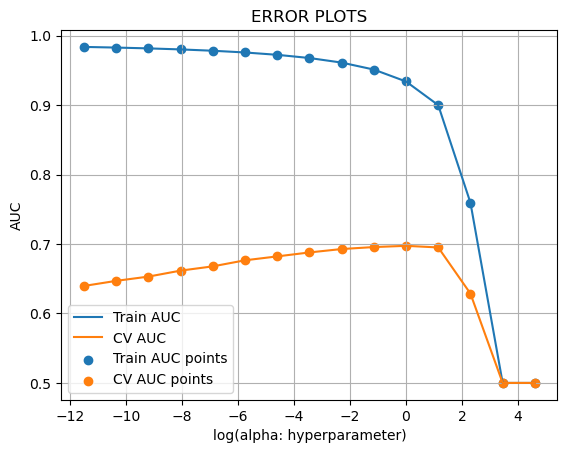

best alpha = 1.0


In [28]:
train_roc_auc132, cv_roc_auc132, best_alpha132 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_BOW_ngram12_asmaxaspossible_features\
    .toarray(), X_stacked_cv_data_BOW_ngram12_asmaxaspossible_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc132, cv_roc_auc132, alpha)
print(f'best alpha = {best_alpha132}')

##### 1.5.1.3.3 Testing the performance of the model on test data, plotting ROC Curves

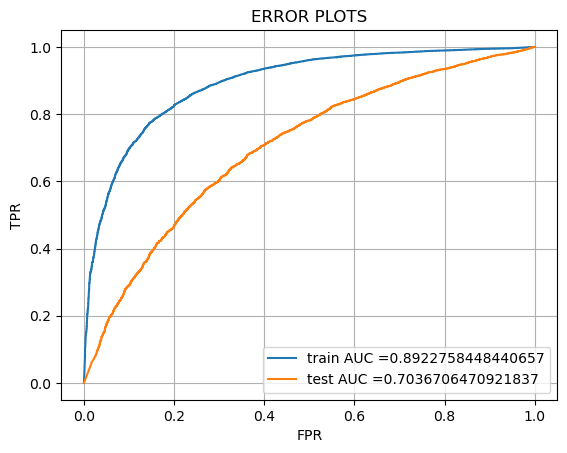

In [29]:
train_fpr133, test_fpr133, train_tpr133, test_tpr133, train_thresholds133, test_thresholds133, \
    y_train_pred133, y_test_pred133, nb_clf133= \
        test_performance_on_best_alpha_with_plot(X_stacked_train_data_BOW_ngram12_asmaxaspossible_features, \
            X_stacked_cv_data_BOW_ngram12_asmaxaspossible_features,\
                X_stacked_test_data_BOW_ngram12_asmaxaspossible_features, best_alpha132, batch_size=500)

In [144]:
#calculate the test roc
test_auc_ngram12_asmaxas_bow = str(auc(test_fpr133, test_tpr133))
print(f'test auc = {test_auc_ngram12_asmaxas_bow}')

test auc = 0.7036706470921837


##### 1.5.1.3.4 find best threshold(write your own code), and get confusion matrix for train and test data


Max value of 'tpr*(1-fpr)' 0.4325882867964667 for threshold 0.927


<AxesSubplot:>

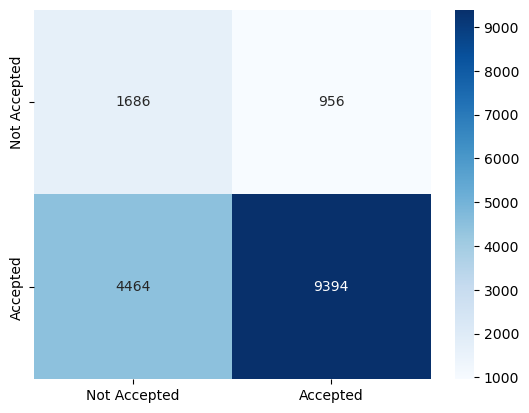

In [39]:
best_threshold134 = find_best_threshold(test_thresholds133, test_fpr133, test_tpr133)
confusion_matrix_test_data134 = confusion_matrix(y_test, predict_with_best_t(y_test_pred133, best_threshold134))
sns.heatmap(confusion_matrix_test_data134, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.1.3.5 Find accuracy using confusion matrix on Train(train+cv) and Test Data


In [40]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data134)}%')

Test data accuracy = 67.15151515151516%


##### 1.5.1.3.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [41]:
top_k_features(essay_bow_asmuchas_max_feature_ngram12, nb_clf133.feature_log_prob_[1], top_k = 20)

Top 20 features name                     Their log_prob
my ultimate               :             -4.900534266495068
learning content          :             -4.927559498534755
classroom continue        :             -4.937152312725354
the culture               :             -5.1737480751369525
not eat                   :             -5.220509109548898
they excel                :             -5.233096282696241
learn engage              :             -5.25941514760162
necessary become          :             -5.287800934801313
help fill                 :             -5.302114171069594
16 years                  :             -5.430112442261141
many learning             :             -5.472585524220939
work extra                :             -5.576151150712926
we going                  :             -5.587651236086899
reading habits            :             -5.591569867080979
need experiences          :             -5.615024784714695
use google                :             -5.660380760103536


*Top 20 features of "project not accepted" class*

In [42]:
top_k_features(essay_bow_asmuchas_max_feature_ngram12, nb_clf133.feature_log_prob_[0], top_k = 20)

Top 20 features name                     Their log_prob
learning content          :             -4.877607110068201
my ultimate               :             -4.945480098789194
classroom continue        :             -5.006540793444094
not eat                   :             -5.190195398714437
learn engage              :             -5.232768144678488
they excel                :             -5.271648543857335
help fill                 :             -5.271976251545013
the culture               :             -5.3148351711504365
necessary become          :             -5.329134665384961
16 years                  :             -5.400510085836059
many learning             :             -5.477776801714278
need experiences          :             -5.608350164583236
we going                  :             -5.609268227535026
work extra                :             -5.639100316254838
come not                  :             -5.7793118510465575
able identify             :             -5.80550940605560

#### 1.5.1.4 catagorical, numerical features + preprocessed_essay(BOW) where ngram_range = (1,4) and max_features = 20k

##### 1.5.1.4.1 Stack all the features

In [66]:
X_stacked_train_data_BOW_ngram14_20k_features, X_stacked_cv_data_BOW_ngram14_20k_features,\
    X_stacked_test_data_BOW_ngram14_20k_features= stack_features(X_train_essay_ngram_20k_max_features_bow, \
        X_cv_essay_ngram_20k_max_features_bow,X_test_essay_ngram_20k_max_features_bow)

Final Data matrix
(22445, 20097) (22445,)
(11055, 20097) (11055,)
(16500, 20097) (16500,)


##### 1.5.1.4.2 Hyperparameter tuning

100%|██████████| 15/15 [00:53<00:00,  3.56s/it]


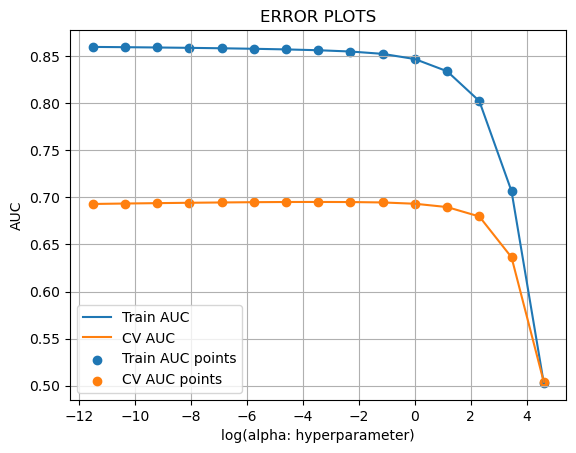

best alpha = 0.03162277660168379


In [67]:
train_roc_auc142, cv_roc_auc142, best_alpha142 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_BOW_ngram14_20k_features\
    .toarray(), X_stacked_cv_data_BOW_ngram14_20k_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc142, cv_roc_auc142, alpha)
print(f'best alpha = {best_alpha142}')

In [68]:
print(f'log of best alpha = {np.log(best_alpha142)}')

log of best alpha = -3.4538776394910684


##### 1.5.1.4.3 Testing the performance of the model on test data, plotting ROC Curves

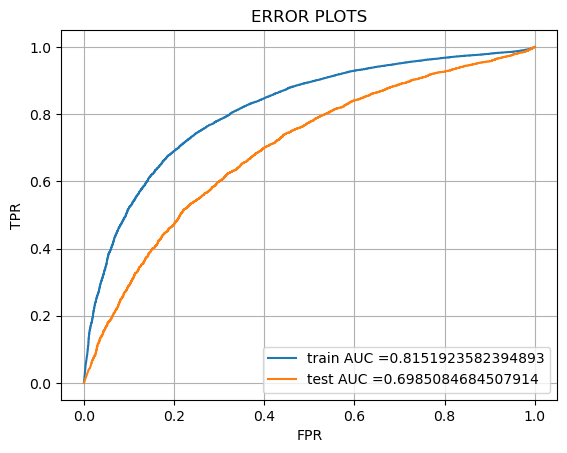

In [69]:
train_fpr143, test_fpr143, train_tpr143, test_tpr143, train_thresholds143, test_thresholds143, \
    y_train_pred143, y_test_pred143, nb_clf143= \
        test_performance_on_best_alpha_with_plot(X_stacked_train_data_BOW_ngram14_20k_features, \
            X_stacked_cv_data_BOW_ngram14_20k_features,X_stacked_test_data_BOW_ngram14_20k_features, best_alpha142,\
                batch_size=500)

In [145]:
#calculate the test roc
test_auc_ngram14_20k_bow = str(auc(test_fpr143, test_tpr143))
print(f'test auc = {test_auc_ngram14_20k_bow}')

test auc = 0.6985084684507914


##### 1.5.1.4.4 find best threshold(write your own code), and get confusion matrix for train and test data


Max value of 'tpr*(1-fpr)' 0.4247590926854178 for threshold 0.935


<AxesSubplot:>

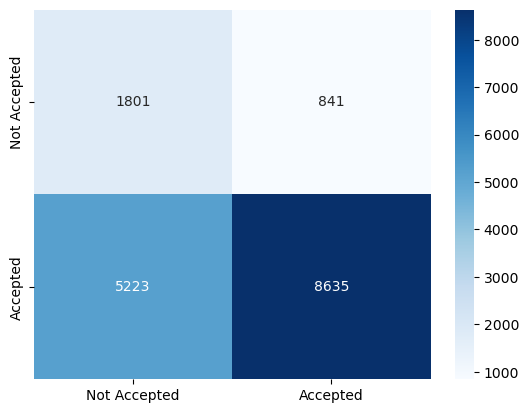

In [70]:
best_threshold144 = find_best_threshold(test_thresholds143, test_fpr143, test_tpr143)
confusion_matrix_test_data144 = confusion_matrix(y_test, predict_with_best_t(y_test_pred143, best_threshold144))
sns.heatmap(confusion_matrix_test_data144, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.1.4.5 Find accuracy using confusion matrix on Test Data


In [71]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data144)}%')

Test data accuracy = 63.24848484848486%


##### 1.5.1.4.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [72]:
top_k_features(essay_bow_20k_ngram14, nb_clf143.feature_log_prob_[1], top_k = 20, space_adjustment=35)

Top 20 features name                               Their log_prob
29                                  :             -5.153461498072501
28 students                         :             -5.5227311118934725
box                                 :             -5.694413965927367
1st grade                           :             -5.774191997996038
2015                                :             -5.877541320425454
me                                  :             -6.003819223976427
20 years                            :             -6.04179944359919
2016                                :             -6.183896710985302
1st grade students                  :             -6.202089023831649
20                                  :             -6.218244742205028
know believe anything               :             -6.236973768253483
actions                             :             -6.321076863386153
22 students                         :             -6.323020936103543
seating option                      :

*Top 20 features of "project not accepted" class*

In [73]:
top_k_features(essay_bow_20k_ngram14, nb_clf143.feature_log_prob_[0], top_k = 20, space_adjustment=35)

Top 20 features name                               Their log_prob
29                                  :             -5.093722033952826
28 students                         :             -5.536691220542414
1st grade                           :             -5.7558491750096765
2015                                :             -5.927313378145152
me                                  :             -5.9520700028256135
20 years                            :             -5.978809187010109
2016                                :             -6.053333068249222
swing                               :             -6.070016218898595
1st grade students                  :             -6.109374858796193
box                                 :             -6.119721393318434
seating option                      :             -6.153568585058552
know believe anything               :             -6.1852646797972834
advantage                           :             -6.189716473027245
20                                

#### 1.5.1.5 catagorical, numerical features + preprocessed_essay(BOW) where ngram_range = (1,4) and max_features = 15k

##### 1.5.1.5.1 Stack all the features

In [74]:
X_stacked_train_data_BOW_ngram14_15k_features, X_stacked_cv_data_BOW_ngram14_15k_features,\
    X_stacked_test_data_BOW_ngram14_15k_features= stack_features(X_train_essay_ngram_15k_max_features_bow, \
        X_cv_essay_ngram_15k_max_features_bow,X_test_essay_ngram_15k_max_features_bow)


Final Data matrix
(22445, 15097) (22445,)
(11055, 15097) (11055,)
(16500, 15097) (16500,)


##### 1.5.1.5.2 Hyperparameter tuning

100%|██████████| 15/15 [00:41<00:00,  2.78s/it]


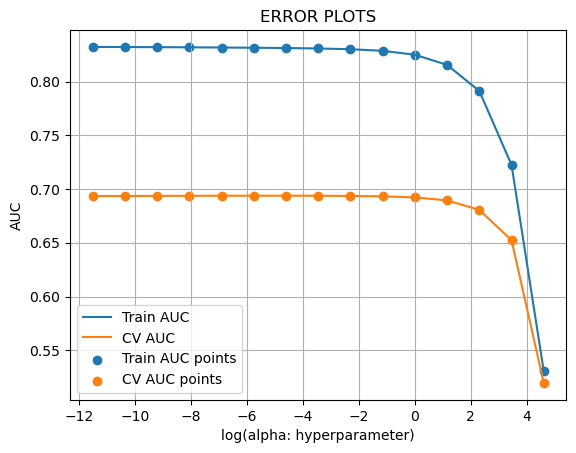

best alpha = 0.0031622776601683794


In [75]:
train_roc_auc152, cv_roc_auc152, best_alpha152 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_BOW_ngram14_15k_features\
    .toarray(), X_stacked_cv_data_BOW_ngram14_15k_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc152, cv_roc_auc152, alpha)
print(f'best alpha = {best_alpha152}')

In [76]:
print(f'log of best alpha = {np.log(best_alpha152)}')

log of best alpha = -5.756462732485114


##### 1.5.1.5.3 Testing the performance of the model on test data, plotting ROC Curves

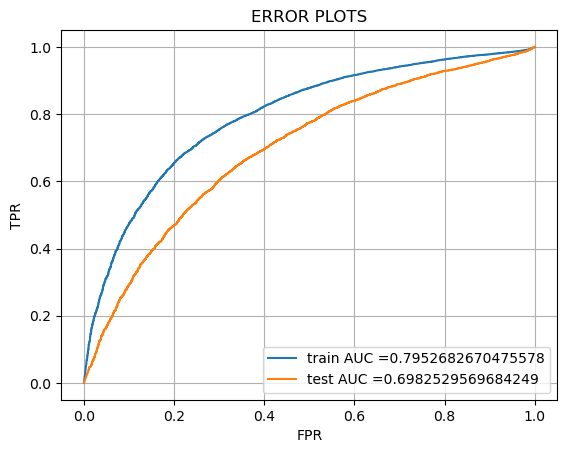

In [77]:
train_fpr153, test_fpr153, train_tpr153, test_tpr153, train_thresholds153, test_thresholds153, \
    y_train_pred153, y_test_pred153, nb_clf153 = \
test_performance_on_best_alpha_with_plot(X_stacked_train_data_BOW_ngram14_15k_features, \
    X_stacked_cv_data_BOW_ngram14_15k_features,X_stacked_test_data_BOW_ngram14_15k_features, best_alpha152,\
        batch_size=500)

In [146]:
#calculate the test roc
test_auc_ngram14_15k_bow = str(auc(test_fpr153, test_tpr153))
print(f'test auc = {test_auc_ngram14_15k_bow}')

test auc = 0.6982529569684249


##### 1.5.1.5.4 find best threshold(write your own code), and get confusion matrix for train and test data


Max value of 'tpr*(1-fpr)' 0.4278547010125082 for threshold 0.846


<AxesSubplot:>

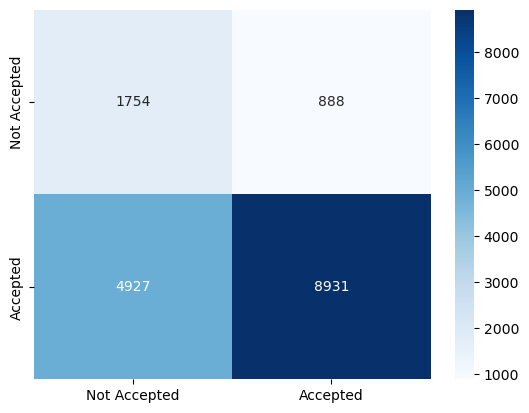

In [81]:
best_threshold154 = find_best_threshold(test_thresholds153, test_fpr153, test_tpr153)
confusion_matrix_test_data154 = confusion_matrix(y_test, predict_with_best_t(y_test_pred153, best_threshold154))
sns.heatmap(confusion_matrix_test_data154, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.1.5.5 Find accuracy using confusion matrix on Test Data


In [82]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data154)}%')

Test data accuracy = 64.75757575757576%


##### 1.5.1.5.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [80]:
top_k_features(essay_bow_15k_ngram14, nb_clf153.feature_log_prob_[1], top_k = 20, space_adjustment=35)

Top 20 features name                               Their log_prob
3rd grade students                  :             -5.103897661797326
3rd grade                           :             -5.473167727463638
breakfast lunch many                :             -5.644850855596989
2016 2017 school year               :             -5.72462903196044
21st century skills                 :             -5.82797855927889
mediums                             :             -5.954256743694277
21st century                        :             -5.992237054967086
21st century students               :             -6.134334697847709
2017                                :             -6.152527062735938
2017 school year                    :             -6.168682828125643
labels                              :             -6.187411909638504
active students                     :             -6.271515267049608
30 students                         :             -6.27345934609432
section                             :   

*Top 20 features of "project not accepted" class*

In [83]:
top_k_features(essay_bow_15k_ngram14, nb_clf153.feature_log_prob_[0], top_k = 20, space_adjustment=35)

Top 20 features name                               Their log_prob
3rd grade students                  :             -5.044281257956573
3rd grade                           :             -5.487253401068639
2016 2017 school year               :             -5.70641337980803
21st century skills                 :             -5.8778795067952245
mediums                             :             -5.902636437515599
21st century                        :             -5.92937596087128
21st century students               :             -6.003900836698137
take care                           :             -6.020584220336756
2017                                :             -6.059943425549176
breakfast lunch many                :             -6.070290112410945
section                             :             -6.104137813664707
labels                              :             -6.135834401428667
ago                                 :             -6.1402862651652805
2017 school year                    :

#### 1.5.1.6 catagorical, numerical features + preprocessed_essay(BOW) where ngram_range = (1,4) and max_features = as much as generated by CountVectorizer

<font color = "red">*I don't have much RAM to process more than 50k max features(approx).That's why it's crashed at Hyperparameter tuning section.*</font>

##### 1.5.1.6.1 Stack all the features

In [26]:
X_stacked_train_data_BOW_ngram14_asmaxaspossible_features, X_stacked_cv_data_BOW_ngram14_asmaxaspossible_features,\
    X_stacked_test_data_BOW_ngram14_asmaxaspossible_features= stack_features(X_train_essay_ngram_asmuchas_max_features_bow, \
        X_cv_essay_ngram_asmuchas_max_features_bow,X_test_essay_ngram_asmuchas_max_features_bow)


Final Data matrix
(22445, 72444) (22445,)
(11055, 72444) (11055,)
(16500, 72444) (16500,)


##### 1.5.1.6.2 Hyperparameter tuning

In [27]:
train_roc_auc162, cv_roc_auc162, best_alpha162 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_BOW_ngram14_asmaxaspossible_features\
    .toarray(), X_stacked_cv_data_BOW_ngram14_asmaxaspossible_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc162, cv_roc_auc162, alpha)
print(f'best alpha = {best_alpha162}')

: 

##### 1.5.1.6.3 Testing the performance of the model on test data, plotting ROC Curves

##### 1.5.1.6.4 find best threshold(write your own code), and get confusion matrix for train and test data


##### 1.5.1.6.5 Find accuracy using confusion matrix on Train(train+cv) and Test Data


##### 1.5.1.6.6 Show top 20 features 

*Top 20 features of "project accepted" class*

*Top 20 features of "project not accepted" class*

#### 1.5.2 Set 2

<li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>

#### 1.5.2.1 catagorical, numerical features + preprocessed_essay(TFIDF) where ngram_range = (1,2) and max_features = 20k


##### 1.5.2.1.1 Stack all the features

In [86]:
X_stacked_train_data_TFIDF_ngram12_20k_features, X_stacked_cv_data_TFIDF_ngram12_20k_features,\
    X_stacked_test_data_TFIDF_ngram12_20k_features= stack_features(X_train_essay_unigram_20k_max_features_tfidf, \
        X_cv_essay_unigram_20k_max_features_tfidf, X_test_essay_unigram_20k_max_features_tfidf)

Final Data matrix
(22445, 20097) (22445,)
(11055, 20097) (11055,)
(16500, 20097) (16500,)


##### 1.5.2.1.2 Hyperparameter tuning

100%|██████████| 15/15 [00:52<00:00,  3.53s/it]


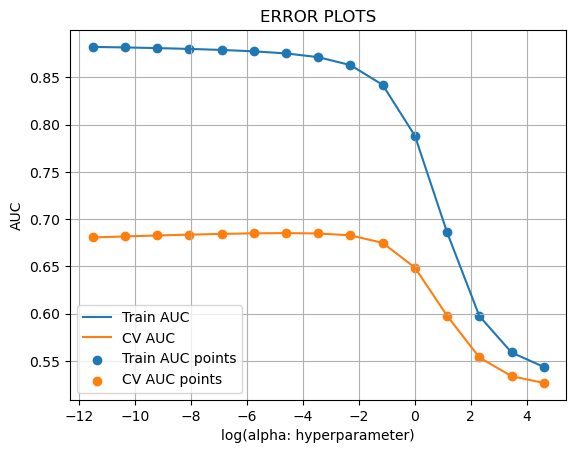

best alpha = 0.01
log(best alpha) = -4.605170185988091


In [87]:
train_roc_auc212, cv_roc_auc212, best_alpha212 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_TFIDF_ngram12_20k_features\
    .toarray(), X_stacked_cv_data_TFIDF_ngram12_20k_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc212, cv_roc_auc212 , alpha)
print(f'best alpha = {best_alpha212}')
print(f'log(best alpha) = {np.log(best_alpha212)}')

##### 1.5.2.1.3 Testing the performance of the model on test data, plotting ROC Curves

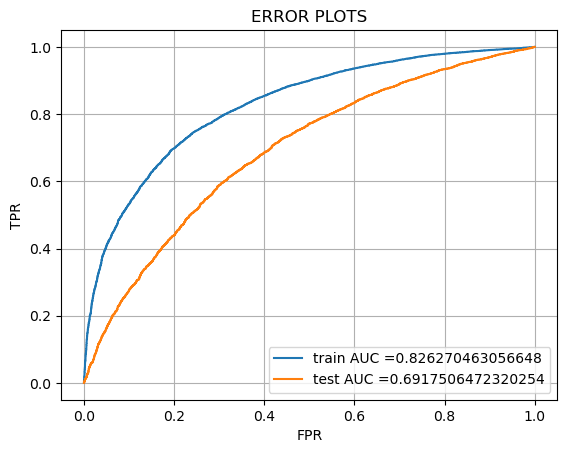

In [88]:
train_fpr213, test_fpr213, train_tpr213, test_tpr213, train_thresholds213, test_thresholds213, \
    y_train_pred213, y_test_pred213, nb_clf213 = \
test_performance_on_best_alpha_with_plot(X_stacked_train_data_TFIDF_ngram12_20k_features, \
    X_stacked_cv_data_TFIDF_ngram12_20k_features,X_stacked_test_data_TFIDF_ngram12_20k_features, best_alpha212,\
        batch_size=500)

In [147]:
#calculate the test roc
test_auc_ngram12_20k_tfidf = str(auc(test_fpr213, test_tpr213))
print(f'test auc = {test_auc_ngram12_20k_tfidf}')

test auc = 0.6917506472320254


##### 1.5.2.1.4 find best threshold(write your own code), and get confusion matrix for train and test data


Max value of 'tpr*(1-fpr)' 0.4163874931731592 for threshold 0.542


<AxesSubplot:>

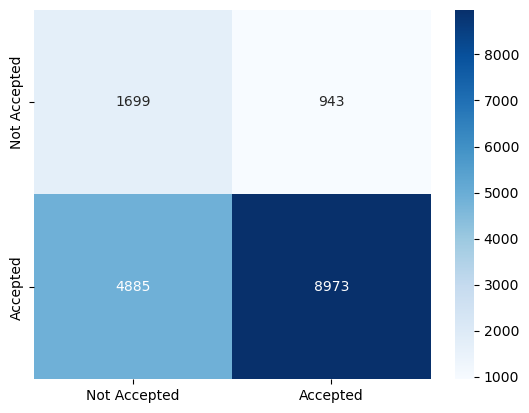

In [89]:
best_threshold214 = find_best_threshold(test_thresholds213, test_fpr213, test_tpr213)
confusion_matrix_test_data214 = confusion_matrix(y_test, predict_with_best_t(y_test_pred213, best_threshold214))
sns.heatmap(confusion_matrix_test_data214, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.2.1.5 Find accuracy using confusion matrix on Test Data


In [90]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data214)}%')

Test data accuracy = 64.67878787878789%


##### 1.5.2.1.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [91]:
top_k_features(essay_tfidf_20k_ngram12, nb_clf213.feature_log_prob_[1], top_k = 20)

Top 20 features name                     Their log_prob
31                        :             -2.904446662764114
300 students              :             -3.2737166198730936
20 minutes                :             -3.5251778238492655
2016 school               :             -3.6285273019424213
2015                      :             -3.792785708132719
2017                      :             -3.9348832607994506
20 students               :             -3.9530756131844296
200                       :             -3.9692313672782937
27 students               :             -4.074007807387934
28 students               :             -4.30560011487626
28                        :             -4.459582218487972
2016                      :             -4.600910524885256
200 students              :             -4.811626314457255
10 minutes                :             -4.822697399688483
26 students               :             -4.847692513733383
30 minutes                :             -5.09596231585

*Top 20 features of "project not accepted" class*

In [92]:
top_k_features(essay_tfidf_20k_ngram12, nb_clf213.feature_log_prob_[0], top_k = 20)

Top 20 features name                     Their log_prob
31                        :             -2.8895527788530924
300 students              :             -3.332524211647886
20 minutes                :             -3.5516837040462503
2016 school               :             -3.7231493688182073
2015                      :             -3.774645667878837
2017                      :             -3.8491703047505093
20 students               :             -3.905212701804466
200                       :             -4.000162166235806
27 students               :             -4.195813751989996
28 students               :             -4.253174200960046
28                        :             -4.517798289084007
2016                      :             -4.639862753607289
200 students              :             -4.722590543417355
10 minutes                :             -4.869192177367373
26 students               :             -4.981925636285954
30 minutes                :             -4.984951311428

#### 1.5.2.2 catagorical, numerical features + preprocessed_essay(TFIDF) where ngram_range = (1,2) and max_features = 15k

##### 1.5.2.2.1 Stack all the features

In [95]:
X_stacked_train_data_TFIDF_ngram12_15k_features, X_stacked_cv_data_TFIDF_ngram12_15k_features,\
    X_stacked_test_data_TFIDF_ngram12_15k_features= stack_features(X_train_essay_unigram_15k_max_features_tfidf, \
        X_cv_essay_unigram_15k_max_features_tfidf, X_test_essay_unigram_15k_max_features_tfidf)
    
    

Final Data matrix
(22445, 15097) (22445,)
(11055, 15097) (11055,)
(16500, 15097) (16500,)


##### 1.5.2.2.2 Hyperparameter tuning

100%|██████████| 15/15 [00:43<00:00,  2.92s/it]


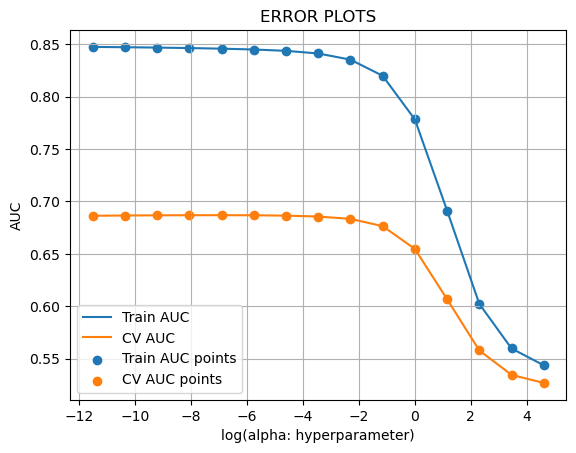

best alpha = 0.001


In [96]:
train_roc_auc222, cv_roc_auc222, best_alpha222 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_TFIDF_ngram12_15k_features\
    .toarray(), X_stacked_cv_data_TFIDF_ngram12_15k_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc222, cv_roc_auc222 , alpha)
print(f'best alpha = {best_alpha222}')

In [97]:
print(f'log(best alpha) = {np.log(best_alpha222)}')

log(best alpha) = -6.907755278982137


##### 1.5.2.2.3 Testing the performance of the model on test data, plotting ROC Curves

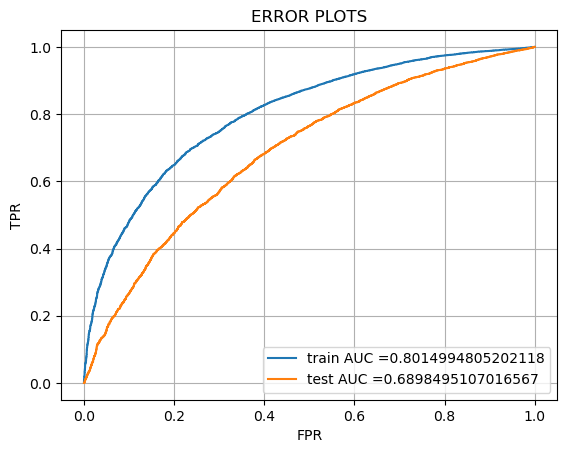

In [98]:
train_fpr223, test_fpr223, train_tpr223, test_tpr223, train_thresholds223, test_thresholds223, \
    y_train_pred223, y_test_pred223, nb_clf223 = \
test_performance_on_best_alpha_with_plot(X_stacked_train_data_TFIDF_ngram12_15k_features, \
    X_stacked_cv_data_TFIDF_ngram12_15k_features,X_stacked_test_data_TFIDF_ngram12_15k_features, best_alpha222,\
        batch_size=500)

In [148]:
#calculate the test roc
test_auc_ngram12_15k_tfidf = str(auc(test_fpr223, test_tpr223))
print(f'test AUC = {test_auc_ngram12_15k_tfidf}')

test AUC = 0.6898495107016567


##### 1.5.2.2.4 find best threshold(write your own code), and get confusion matrix for train and test data


Max value of 'tpr*(1-fpr)' 0.4126056501058809 for threshold 0.52


<AxesSubplot:>

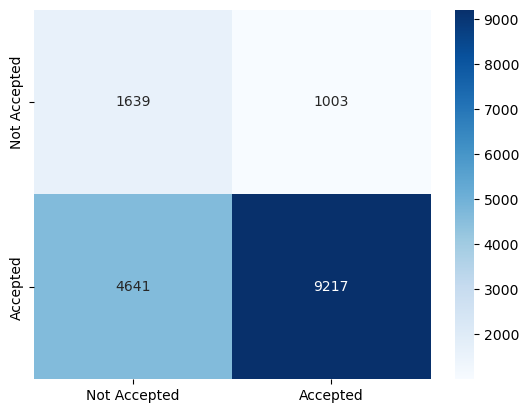

In [99]:
best_threshold224 = find_best_threshold(test_thresholds223, test_fpr223, test_tpr223)
confusion_matrix_test_data224 = confusion_matrix(y_test, predict_with_best_t(y_test_pred223, best_threshold224))
sns.heatmap(confusion_matrix_test_data224, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.2.2.5 Find accuracy using confusion matrix on Test Data


In [100]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data224)}%')

Test data accuracy = 65.7939393939394%


##### 1.5.2.2.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [101]:
top_k_features(essay_tfidf_15k_ngram12, nb_clf223.feature_log_prob_[1], top_k = 20)

Top 20 features name                     Their log_prob
44                        :             -2.8891823110334034
42                        :             -3.258452411028573
22 students               :             -3.5099137473128064
28                        :             -3.6132632901976702
25 students               :             -3.777521814187608
28 students               :             -3.9196194855963924
23                        :             -3.9378118544384986
24                        :             -3.953967623400267
3d printer                :             -4.0587441659901575
3rd                       :             -4.290336741959617
3d printing               :             -4.4443190617661426
27                        :             -4.585647598128835
24 students               :             -4.796363796978248
10 students               :             -4.8074349061906485
36                        :             -4.832430075364044
2nd                       :             -5.08070050

*Top 20 features of "project not accepted" class*

In [102]:
top_k_features(essay_tfidf_15k_ngram12, nb_clf223.feature_log_prob_[0], top_k = 20)

Top 20 features name                     Their log_prob
44                        :             -2.873396408781451
42                        :             -3.3163687765160432
22 students               :             -3.53552890905042
28                        :             -3.7069951822034275
25 students               :             -3.758491685299858
28 students               :             -3.8330166366913003
23                        :             -3.8890592861941746
24                        :             -3.9840092119890285
3d printer                :             -4.17966189843823
3rd                       :             -4.237022713090983
3d printing               :             -4.501648788438381
27                        :             -4.623714362593133
24 students               :             -4.706442985251073
10 students               :             -4.85304627541668
36                        :             -4.965781183729636
2nd                       :             -4.96880690006868

#### 1.5.2.3 catagorical, numerical features + preprocessed_essay(TFIDF) where ngram_range = (1,2) and max_features = as much as generated by CountVectorizer

##### 1.5.2.3.1 Stack all the features

In [103]:
X_stacked_train_data_TFIDF_ngram12_asmaxaspossible_features, X_stacked_cv_data_TFIDF_ngram12_asmaxaspossible_features,\
    X_stacked_test_data_TFIDF_ngram12_asmaxaspossible_features= stack_features(X_train_essay_unigram_asmuchas_max_features_tfidf, \
        X_cv_essay_unigram_asmuchas_max_features_tfidf, X_test_essay_unigram_asmuchas_max_features_tfidf)

Final Data matrix
(22445, 50966) (22445,)
(11055, 50966) (11055,)
(16500, 50966) (16500,)


##### 1.5.2.3.2 Hyperparameter tuning

100%|██████████| 15/15 [01:52<00:00,  7.50s/it]


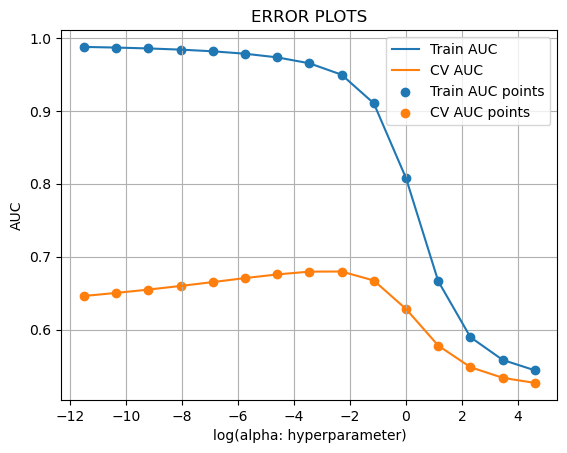

best alpha = 0.1
log(best alpha) = -2.3025850929940455


In [33]:
train_roc_auc232, cv_roc_auc232, best_alpha232 = get_train_cv_auc_and_best_alpha(\
    X_stacked_train_data_TFIDF_ngram12_asmaxaspossible_features.toarray(), \
        X_stacked_cv_data_TFIDF_ngram12_asmaxaspossible_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc232, cv_roc_auc232 , alpha)
print(f'best alpha = {best_alpha232}')
print(f'log(best alpha) = {np.log(best_alpha232)}')

##### 1.5.2.3.3 Testing the performance of the model on test data, plotting ROC Curves

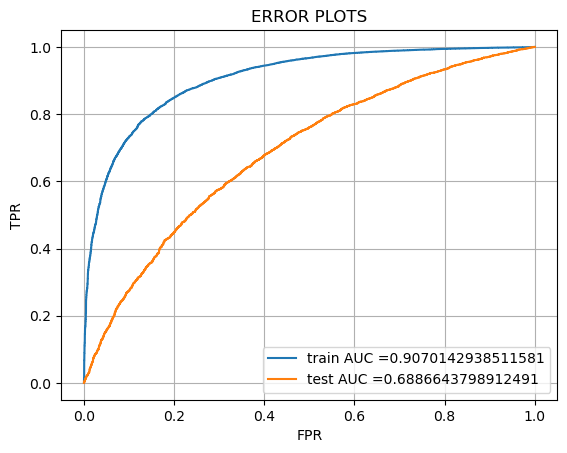

In [34]:
train_fpr233, test_fpr233, train_tpr233, test_tpr233, train_thresholds233, test_thresholds233, \
    y_train_pred233, y_test_pred233, nb_clf233 = \
test_performance_on_best_alpha_with_plot(X_stacked_train_data_TFIDF_ngram12_asmaxaspossible_features, \
    X_stacked_cv_data_TFIDF_ngram12_asmaxaspossible_features,X_stacked_test_data_TFIDF_ngram12_asmaxaspossible_features, best_alpha232,\
        batch_size=500)

In [150]:
#calculate the test roc
test_auc_ngram12_asmaxas_tfidf = str(auc(test_fpr233, test_tpr233))
print(f'test AUC = {test_auc_ngram12_asmaxas_tfidf}')

test AUC = 0.6886643798912491


##### 1.5.2.3.4 find best threshold(write your own code), and get confusion matrix for train and test data


Max value of 'tpr*(1-fpr)' 0.40977279115990906 for threshold 0.585


<AxesSubplot:>

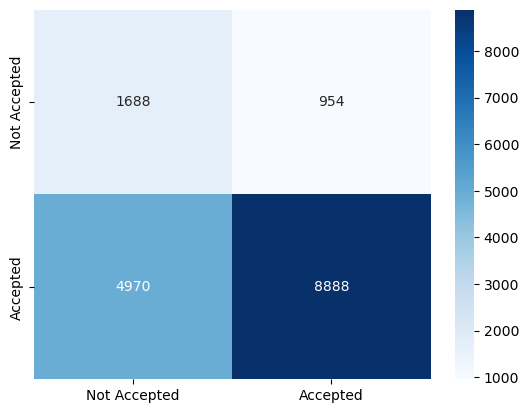

In [35]:
best_threshold234 = find_best_threshold(test_thresholds233, test_fpr233, test_tpr233)
confusion_matrix_test_data234 = confusion_matrix(y_test, predict_with_best_t(y_test_pred233, best_threshold234))
sns.heatmap(confusion_matrix_test_data234, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.2.3.5 Find accuracy using confusion matrix on Train(train+cv) and Test Data


In [36]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data234)}%')

Test data accuracy = 64.0969696969697%


##### 1.5.2.3.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [37]:
top_k_features(essay_tfidf_asmuchas_ngram12, nb_clf233.feature_log_prob_[1], top_k = 20)

Top 20 features name                     Their log_prob
16 years                  :             -2.9575270594464076
16 students               :             -3.32679558769963
11th grade                :             -3.578255468602908
120                       :             -3.6816042987834514
12 special                :             -3.845861526986665
120 students              :             -3.987957892243797
12                        :             -4.006150080059143
12 grade                  :             -4.022305685475475
15                        :             -4.127081100793658
15 different              :             -4.358670723505011
15 20                     :             -4.512650665202061
12 year                   :             -4.653976671986477
12 public                 :             -4.864688368872121
10                        :             -4.87575921429732
140                       :             -4.900753777070626
1200 students             :             -5.149017285940223


*Top 20 features of "project not accepted" class*

In [104]:
top_k_features(essay_tfidf_asmuchas_ngram12, nb_clf233.feature_log_prob_[0], top_k = 20)

Top 20 features name                     Their log_prob
16 years                  :             -2.979122422694484
16 students               :             -3.4220845063118936
11th grade                :             -3.6412375975566045
120                       :             -3.812697178756081
12 special                :             -3.8641914375476407
120 students              :             -3.938712929367683
12                        :             -3.994752802057577
12 grade                  :             -4.089697653100548
15                        :             -4.2853382325879075
15 different              :             -4.342695024987428
15 20                     :             -4.607299242528006
12 year                   :             -4.729352611847446
12 public                 :             -4.812072074101482
10                        :             -4.958657147957244
140                       :             -5.071376114983757
1500                      :             -5.074401378219

#### 1.5.2.4 catagorical, numerical features + preprocessed_essay(TFIDF) where ngram_range = (1,4) and max_features = 20k

##### 1.5.2.4.1 Stack all the features

In [107]:
X_stacked_train_data_TFIDF_ngram14_20k_features, X_stacked_cv_data_TFIDF_ngram14_20k_features,\
    X_stacked_test_data_TFIDF_ngram14_20k_features= stack_features(X_train_essay_ngram_20k_max_features_tfidf, \
        X_cv_essay_ngram_20k_max_features_tfidf, X_test_essay_ngram_20k_max_features_tfidf)

Final Data matrix
(22445, 20097) (22445,)
(11055, 20097) (11055,)
(16500, 20097) (16500,)


##### 1.5.2.4.2 Hyperparameter tuning

100%|██████████| 15/15 [00:54<00:00,  3.64s/it]


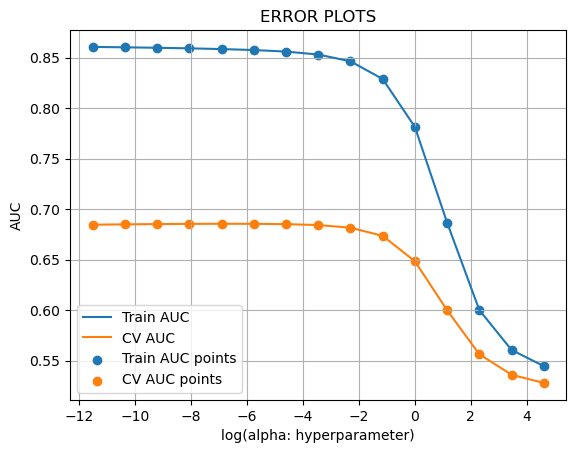

best alpha = 0.001
log(best alpha) = -6.907755278982137


In [108]:
train_roc_auc242, cv_roc_auc242, best_alpha242 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_TFIDF_ngram14_20k_features\
    .toarray(), X_stacked_cv_data_TFIDF_ngram14_20k_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc242, cv_roc_auc242 , alpha)
print(f'best alpha = {best_alpha242}')
print(f'log(best alpha) = {np.log(best_alpha242)}')

##### 1.5.2.4.3 Testing the performance of the model on test data, plotting ROC Curves

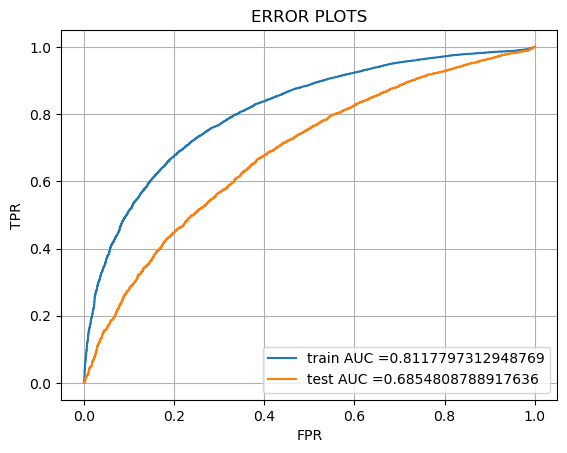

In [109]:
train_fpr243, test_fpr243, train_tpr243, test_tpr243, train_thresholds243, test_thresholds243, \
    y_train_pred243, y_test_pred243, nb_clf243 = \
test_performance_on_best_alpha_with_plot(X_stacked_train_data_TFIDF_ngram14_20k_features, \
    X_stacked_cv_data_TFIDF_ngram14_20k_features,X_stacked_test_data_TFIDF_ngram14_20k_features, best_alpha242,\
        batch_size=500)

In [151]:
#calculate the test roc
test_auc_ngram14_20k_tfidf = str(auc(test_fpr243, test_tpr243))
print(f'test AUC = {test_auc_ngram14_20k_tfidf}')

test AUC = 0.6854808788917636


##### 1.5.2.4.4 find best threshold(write your own code), and get confusion matrix for train and test data


Max value of 'tpr*(1-fpr)' 0.40949586642236613 for threshold 0.532


<AxesSubplot:>

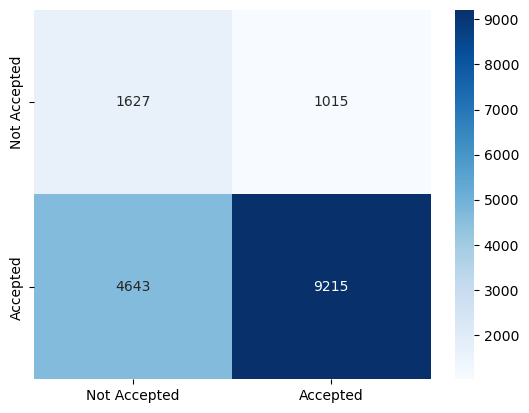

In [110]:
best_threshold244 = find_best_threshold(test_thresholds243, test_fpr243, test_tpr243)
confusion_matrix_test_data244 = confusion_matrix(y_test, predict_with_best_t(y_test_pred243, best_threshold244))
sns.heatmap(confusion_matrix_test_data244, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.2.4.5 Find accuracy using confusion matrix on Test Data


In [111]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data244)}%')

Test data accuracy = 65.7090909090909%


##### 1.5.2.4.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [112]:
top_k_features(essay_tfidf_20k_ngram14, nb_clf243.feature_log_prob_[1], top_k = 20)

Top 20 features name                     Their log_prob
29                        :             -2.9253356256960057
28 students               :             -3.2946057256911754
1st grade                 :             -3.5460670619754087
2015                      :             -3.6494166048602725
20 years                  :             -3.8136751288502104
2016                      :             -3.9557728002589947
1st grade students        :             -3.973965169101101
20                        :             -3.9901209380628693
22 students               :             -4.09489748065276
23 students               :             -4.3264900566222195
23                        :             -4.480472376428745
200 students              :             -4.6218009127914375
20 minutes                :             -4.8325171116408505
10 minutes                :             -4.843588220853251
21st century technology   :             -4.868583390026647
2016 2017 school          :             -5.1168538

*Top 20 features of "project not accepted" class*

In [113]:
top_k_features(essay_tfidf_20k_ngram14, nb_clf243.feature_log_prob_[0], top_k = 20)

Top 20 features name                     Their log_prob
29                        :             -2.909984346321062
28 students               :             -3.3529567140556544
1st grade                 :             -3.5721168465900313
2015                      :             -3.7435831197430387
20 years                  :             -3.795079622839469
2016                      :             -3.8696045742309115
1st grade students        :             -3.925647223733786
20                        :             -4.02059714952864
22 students               :             -4.216249835977841
23 students               :             -4.273610650630594
23                        :             -4.538236725977992
200 students              :             -4.660302300132744
20 minutes                :             -4.743030922790684
10 minutes                :             -4.889634212956291
21st century technology   :             -5.002369121269247
2016 2017 school          :             -5.0053948376082

#### 1.5.2.5 catagorical, numerical features + preprocessed_essay(TFIDF) where ngram_range = (1,4) and max_features = 15k

##### 1.5.2.5.1 Stack all the features

In [116]:
X_stacked_train_data_TFIDF_ngram14_15k_features, X_stacked_cv_data_TFIDF_ngram14_15k_features,\
    X_stacked_test_data_TFIDF_ngram14_15k_features= stack_features(X_train_essay_ngram_15k_max_features_tfidf, \
        X_cv_essay_ngram_15k_max_features_tfidf, X_test_essay_ngram_15k_max_features_tfidf)

Final Data matrix
(22445, 15097) (22445,)
(11055, 15097) (11055,)
(16500, 15097) (16500,)


##### 1.5.2.5.2 Hyperparameter tuning

100%|██████████| 15/15 [00:41<00:00,  2.75s/it]


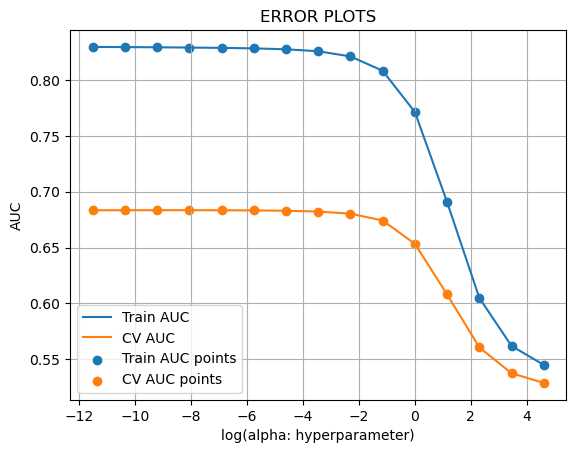

best alpha = 0.00031622776601683794
log(best alpha) = -8.05904782547916


In [117]:
train_roc_auc252, cv_roc_auc252, best_alpha252 = get_train_cv_auc_and_best_alpha(X_stacked_train_data_TFIDF_ngram14_15k_features\
    .toarray(), X_stacked_cv_data_TFIDF_ngram14_15k_features.toarray(), alpha, class_prior, batch_size=500)

#plot roc_auc 2d curve
hyperparam_tune_using_train_cv_auc_plot(train_roc_auc252, cv_roc_auc252 , alpha)
print(f'best alpha = {best_alpha252}')
print(f'log(best alpha) = {np.log(best_alpha252)}')

##### 1.5.2.5.3 Testing the performance of the model on test data, plotting ROC Curves

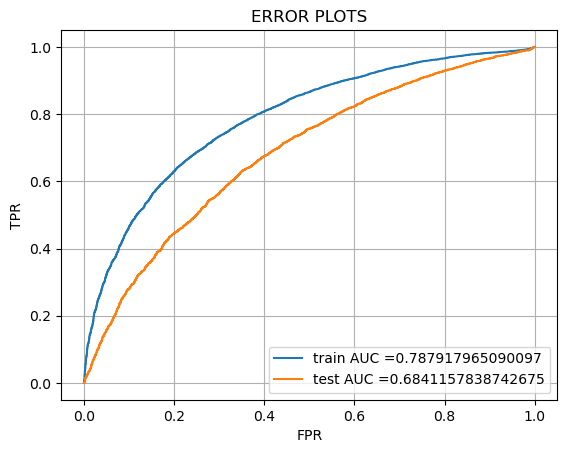

In [119]:
train_fpr253, test_fpr253, train_tpr253, test_tpr253, train_thresholds253, test_thresholds253, \
    y_train_pred253, y_test_pred253, nb_clf253 = \
test_performance_on_best_alpha_with_plot(X_stacked_train_data_TFIDF_ngram14_15k_features, \
    X_stacked_cv_data_TFIDF_ngram14_15k_features,X_stacked_test_data_TFIDF_ngram14_15k_features, best_alpha252,\
        batch_size=500)

In [152]:
#calculate the test roc
test_auc_ngram14_15k_tfidf = str(auc(test_fpr253, test_tpr253))
print(f'test AUC = {test_auc_ngram14_15k_tfidf}')

test AUC = 0.6841157838742675


##### 1.5.2.5.4 find best threshold(write your own code), and get confusion matrix for train and test data


Max value of 'tpr*(1-fpr)' 0.4099145993498018 for threshold 0.542


<AxesSubplot:>

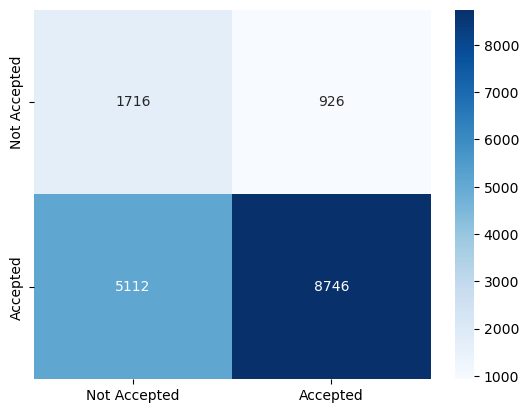

In [120]:
best_threshold254 = find_best_threshold(test_thresholds253, test_fpr253, test_tpr253)
confusion_matrix_test_data254 = confusion_matrix(y_test, predict_with_best_t(y_test_pred253, best_threshold254))
sns.heatmap(confusion_matrix_test_data254, annot=True, fmt='d', cmap='Blues', \
    xticklabels=['Not Accepted','Accepted'], yticklabels=['Not Accepted','Accepted'])

##### 1.5.2.5.5 Find accuracy using confusion matrix on Test Data


In [121]:
print(f'Test data accuracy = {accuracy_using_conf_matrix(confusion_matrix_test_data254)}%')

Test data accuracy = 63.40606060606061%


##### 1.5.2.5.6 Show top 20 features 

*Top 20 features of "project accepted" class*

In [122]:
top_k_features(essay_tfidf_15k_ngram14, nb_clf253.feature_log_prob_[1], top_k = 20)

Top 20 features name                     Their log_prob
3rd grade students        :             -2.9075874144304112
3rd grade                 :             -3.2768575252813203
2016 2017 school year     :             -3.528318871617623
21st century skills       :             -3.6316684194250204
21st century              :             -3.7959269523647574
21st century students     :             -3.9380246327949404
2017                      :             -3.9562170028873727
2017 school year          :             -3.9723727729787264
30 students               :             -4.077149323354529
300 students              :             -4.308741919721788
300                       :             -4.462724255953672
21st century learners     :             -4.604052809787946
21                        :             -4.81476903973215
10 students               :             -4.825840150766517
30                        :             -4.850835324128296
3d printer                :             -5.0991058034

*Top 20 features of "project not accepted" class*

In [123]:
top_k_features(essay_tfidf_15k_ngram14, nb_clf253.feature_log_prob_[0], top_k = 20)

Top 20 features name                     Their log_prob
3rd grade students        :             -2.8926473050512946
3rd grade                 :             -3.3356197438178157
2016 2017 school year     :             -3.5547799249864838
21st century skills       :             -3.7262462443612305
21st century              :             -3.777742762959285
21st century students     :             -3.852267738246378
2017                      :             -3.9083104069290746
2017 school year          :             -4.003260367776064
30 students               :             -4.198913137850737
300 students              :             -4.256273980286312
300                       :             -4.520900206613627
21st century learners     :             -4.642965865073115
21                        :             -4.725694551007102
10 students               :             -4.8722979670047115
30                        :             -4.985032985436485
22 students               :             -4.9880587049

#### 1.5.2.6 catagorical, numerical features + preprocessed_essay(TFIDF) where ngram_range = (1,4) and max_features = as much as generated by CountVectorizer

<font color = "red">*I don't have much RAM to process more than 50k max features.*</font>

##### 1.5.2.6.1 Stack all the features

In [ ]:
X_stacked_train_data_TFIDF_ngram14_asmaxaspossible_features, X_stacked_cv_data_TFIDF_ngram14_asmaxaspossible_features,\
    X_stacked_test_data_TFIDF_ngram14_asmaxaspossible_features= stack_features(X_train_essay_ngram_asmuchas_max_features_tfidf, \
        X_cv_essay_ngram_asmuchas_max_features_tfidf, X_test_essay_ngram_asmuchas_max_features_tfidf)

##### 1.5.2.6.2 Hyperparameter tuning


##### 1.5.2.6.3 Testing the performance of the model on test data, plotting ROC Curves

##### 1.5.2.6.4 find best threshold(write your own code), and get confusion matrix for train and test data


##### 1.5.2.6.5 Find accuracy using confusion matrix on Train(train+cv) and Test Data


##### 1.5.2.6.6 Show top 20 features 

*Top 20 features of "project accepted" class*

*Top 20 features of "project not accepted" class*

<h1>3. Summary</h1>

                AUC                                             alpha
        test_auc_ngram12_20k_bow                            best_alpha112
        test_auc_ngram12_15k_bow                            best_alpha122
        test_auc_ngram12_asmaxas_bow                        best_alpha132
        test_auc_ngram14_15k_bow                            best_alpha152
        test_auc_ngram14_20k_bow                            best_alpha142

        test_auc_ngram12_20k_tfidf                          best_alpha212
        test_auc_ngram12_15k_tfidf                          best_alpha222
        test_auc_ngram12_asmaxas_tfidf                      best_alpha232
        test_auc_ngram14_15k_tfidf                          best_alpha252
        test_auc_ngram14_20k_tfidf                          best_alpha242




In [155]:
from prettytable import PrettyTable

#specify the column name of the table
table = PrettyTable(field_names=['Vectorizer','ngram_range', 'max_features', 'Model', 'Best Hyper Parameter', 'test AUC'])

#add the records/rows/details
table.add_row(['BOW', '(1,2)', '15k', 'MultinomialNB', best_alpha122, test_auc_ngram12_15k_bow])
table.add_row(['BOW', '(1,2)', '20k', 'MultinomialNB', best_alpha112, test_auc_ngram12_20k_bow ])
table.add_row(['BOW', '(1,2)', 'as max as', 'MultinomialNB', best_alpha132, test_auc_ngram12_asmaxas_bow])
table.add_row(['BOW', '(1,4)','15k', 'MultinomialNB', best_alpha152, test_auc_ngram14_15k_bow])
table.add_row(['BOW', '(1,4)', '20k', 'MultinomialNB', best_alpha142, test_auc_ngram14_20k_bow])

table.add_row(['TFIDF', '(1,2)', '15k', 'MultinomialNB', best_alpha222, test_auc_ngram12_15k_tfidf])
table.add_row(['TFIDF', '(1,2)', '20k', 'MultinomialNB', best_alpha212, test_auc_ngram12_20k_tfidf])
table.add_row(['TFIDF', '(1,2)', 'as max as', 'MultinomialNB', best_alpha232, test_auc_ngram12_asmaxas_tfidf])
table.add_row(['TFIDF', '(1,4)', '15k', 'MultinomialNB', best_alpha252, test_auc_ngram14_15k_tfidf])
table.add_row(['TFIDF', '(1,4)', '20k', 'MultinomialNB', best_alpha242, test_auc_ngram14_20k_tfidf])
print(table)



+------------+-------------+--------------+---------------+------------------------+--------------------+
| Vectorizer | ngram_range | max_features |     Model     |  Best Hyper Parameter  |      test AUC      |
+------------+-------------+--------------+---------------+------------------------+--------------------+
|    BOW     |    (1,2)    |     15k      | MultinomialNB |          0.01          | 0.7043994352144696 |
|    BOW     |    (1,2)    |     20k      | MultinomialNB |          0.1           | 0.7062433104062192 |
|    BOW     |    (1,2)    |  as max as   | MultinomialNB |          1.0           | 0.7036706470921837 |
|    BOW     |    (1,4)    |     15k      | MultinomialNB | 0.0031622776601683794  | 0.6982529569684249 |
|    BOW     |    (1,4)    |     20k      | MultinomialNB |  0.03162277660168379   | 0.6985084684507914 |
|   TFIDF    |    (1,2)    |     15k      | MultinomialNB |         0.001          | 0.6898495107016567 |
|   TFIDF    |    (1,2)    |     20k      | Mu

- I have used only 50k data points because of lower RAM.
- The best performing model is the BOW vectorizer with n-gram range (1, 2) and 20k features, achieving a test AUC of 0.7062.
- TF-IDF consistently shows lower AUC values compared to BOW, indicating that BOW might be better suited for this dataset with the given configurations.
- BOW n-gram range (1, 2) have higher AUC values than n-gram range (1, 4) and same for TFIDF also. 

**Note:: *Things will change much if we use total dataset points of Donor Choose dataset.***